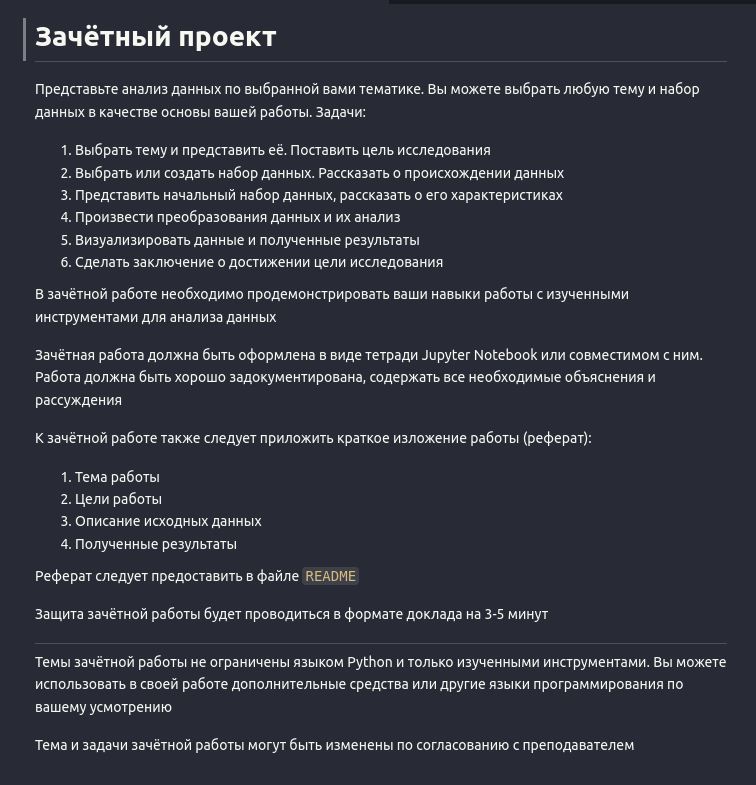

### Тема: Анализ экономических показателей: Стоимость жизни и уровень доходов в разных странах


<u>Цели исследования:</u>

- Выявить тенденции изменения стоимости жизни и среднемесячного дохода в различных регионах мира.
- Сравнить экономические показатели разных стран.
- С помощью линейной регрессии научиться предсказывать стоимость жизни.

# Этап 0
# Импортирование библиотек

In [699]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.impute import KNNImputer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from matplotlib.patches import Patch
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import re
from sklearn.metrics import r2_score

# Этап 1
# Получение информации о данных

## a) Входные данные

In [700]:
# Установим цвет
color = 'Red'
PATH = os.path.join(os.getcwd(), 'Cost_of_Living_and_Income_Extended.csv')
# Скачиваем данные из файла Cost_of_Living_and_Income_Extended.csv
DF_LOADED = pd.read_csv(PATH)

# выведем первые 10 записей в таблице
DF_LOADED.head(10) 

Country  Year  Average_Monthly_Income  Cost_of_Living  \
0     Australia  2013                 3483.92         1106.07   
1         India  2019                 7771.03         5422.78   
2        Russia  2004                 6991.30         3972.36   
3  South Africa  2011                 6628.04         6755.75   
4        Brazil  2015                 2434.27         2656.36   
5     Australia  2015                 1781.66         4575.30   
6         China  2020                 5514.82         6551.39   
7         Japan  2006                 7470.32         1076.56   
8     Australia  2003                 4675.72         6585.71   
9        Russia  2000                 4787.10         4940.05   

   Housing_Cost_Percentage  Tax_Rate  Savings_Percentage  \
0                    32.09     27.50                1.74   
1                    25.21     29.30                3.35   
2                    40.85     22.94               15.48   
3                    30.38     15.69                8.03   
4                    49.27     12.44               25.06   
5                    39.23      6.16                0.44   
6                    44.67     15.64               11.37   
7                    23.98     27.86               10.12   
8                    45.86     37.84                0.58   
9                    47.68     35.49                3.73   

   Healthcare_Cost_Percentage  Education_Cost_Percentage  \
0                       18.23                       6.94   
1                       17.21                      12.42   
2                       15.28                       7.10   
3                        6.66                      11.76   
4                        9.34                       3.63   
5                        9.65                      12.05   
6                        8.75                       5.08   
7                       12.73                      10.81   
8                       13.03                       9.36   
9                       10.35                      14.08   

   Transportation_Cost_Percentage         Region  
0                           17.19        Oceania  
1                            9.90           Asia  
2                            9.59         Europe  
3                           11.04         Africa  
4                           15.09  South America  
5                           15.23        Oceania  
6                            9.73           Asia  
7                            7.00           Asia  
8                           14.49        Oceania  
9                            6.92         Europe

In [701]:
#Выясним если в данных значения "NULL" и тип данных каждого столбца
DF_LOADED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         500 non-null    object 
 1   Year                            500 non-null    int64  
 2   Average_Monthly_Income          500 non-null    float64
 3   Cost_of_Living                  500 non-null    float64
 4   Housing_Cost_Percentage         500 non-null    float64
 5   Tax_Rate                        500 non-null    float64
 6   Savings_Percentage              500 non-null    float64
 7   Healthcare_Cost_Percentage      500 non-null    float64
 8   Education_Cost_Percentage       500 non-null    float64
 9   Transportation_Cost_Percentage  500 non-null    float64
 10  Region                          500 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 43.1+ KB


## b) Разберемся о количестве данных для каждой страны и для каждого года

Text(0.5, 1.0, 'Количество данных в странах')

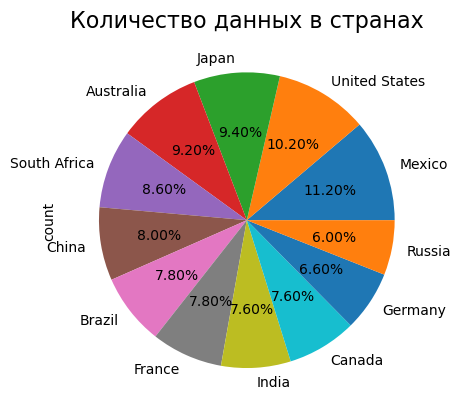

In [702]:
DF_LOADED['Country'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('Количество данных в странах', fontsize = 16)

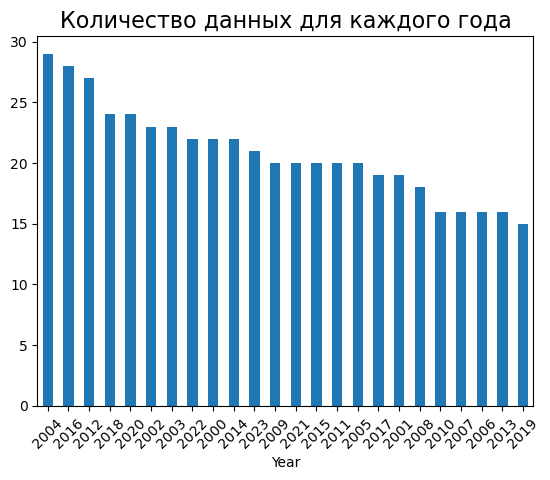

In [703]:
DF_LOADED['Year'].value_counts().plot(kind = 'bar')
plt.title('Количество данных для каждого года', fontsize = 16)
plt.xticks(rotation = 45)
plt.show()

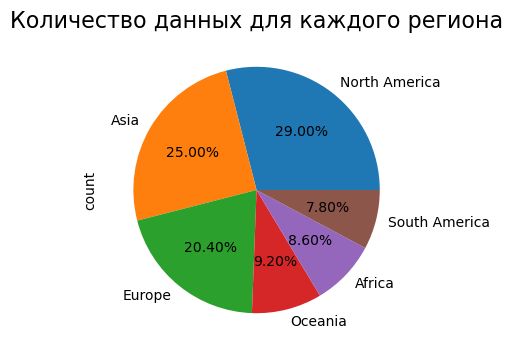

In [704]:
plt.figure(figsize = (6,4))
DF_LOADED['Region'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('Количество данных для каждого региона', fontsize = 16)
plt.xticks(rotation = 45)
plt.show()

In [705]:
DF_LOADED.describe()

Year  Average_Monthly_Income  Cost_of_Living  \
count   500.000000              500.000000       500.00000   
mean   2011.514000             4291.248240      3716.23212   
std       7.018284             2179.217333      1922.16053   
min    2000.000000              534.740000       432.60000   
25%    2005.000000             2322.360000      1967.79000   
50%    2012.000000             4391.585000      3803.20500   
75%    2018.000000             6233.757500      5265.96750   
max    2023.000000             7984.510000      6996.13000   

       Housing_Cost_Percentage    Tax_Rate  Savings_Percentage  \
count               500.000000  500.000000           500.00000   
mean                 34.973700   22.400900            14.92708   
std                   8.657032   10.025412             8.81321   
min                  20.100000    5.000000             0.00000   
25%                  27.235000   14.742500             7.52500   
50%                  35.170000   22.275000            14.95000   
75%                  42.567500   30.905000            22.42750   
max                  49.950000   39.920000            29.84000   

       Healthcare_Cost_Percentage  Education_Cost_Percentage  \
count                  500.000000                 500.000000   
mean                    12.381820                   8.408440   
std                      4.269823                   3.775455   
min                      5.010000                   2.000000   
25%                      8.487500                   5.285000   
50%                     12.365000                   8.245000   
75%                     16.222500                  11.595000   
max                     19.990000                  14.940000   

       Transportation_Cost_Percentage  
count                      500.000000  
mean                        12.475940  
std                          4.219147  
min                          5.060000  
25%                          8.752500  
50%                         12.665000  
75%                         15.952500  
max                         19.970000

### Вывод
Если посмотреть повнимательнее на данные то можно заметить, что у всех столбцов медиана и среднее занчение отличаются очень не значительно и можно выдвенуть предположение о том, что данные будут нормально распределены

## c) Посмотрим на гистограмму для определения правдиво ли наше предположение

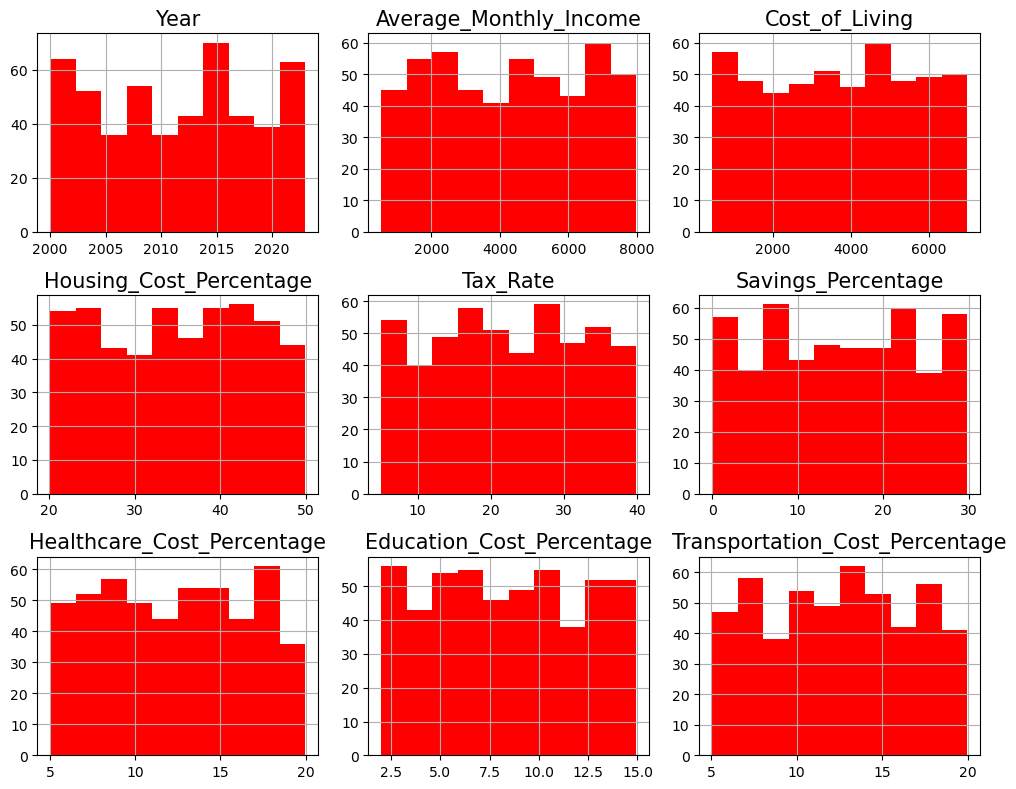

In [706]:
def print_graphs(bins= 10):
    fig, axs = plt.subplots(3, 3, figsize= (10, 8))
    for i, column in enumerate(DF_LOADED.iloc[:, 1:10].columns):
        ax = axs[i // 3, i % 3]
        DF_LOADED[column].hist(ax= ax, bins= bins, color= color)
        ax.set_title(column, fontsize=15)
    # Установка цветовой гаммы 'Reds'
    plt.tight_layout()
print_graphs()

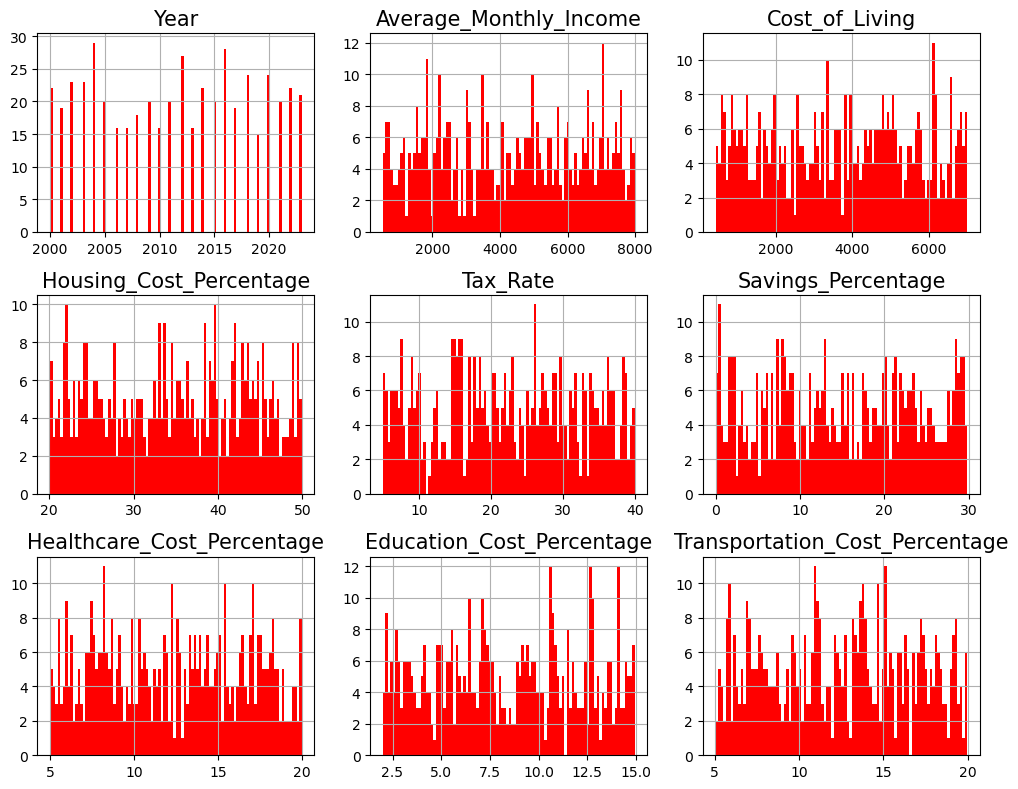

In [707]:
print_graphs(bins= 100)

### Вывод
Осмотрев графики можно понять, что конкретного вывода о том, что в этих графиках есть нормальное распределение сделать нельзя. Более того на графиках можно заметить, что в наших данных есть выбросы, это резкие пики, которые появляются в определенных значениях -> перед анализом необходимо сделать обработку данных

# Этап 2
# Выявить тенденции изменения стоимости жизни и среднемесячного дохода в различных регионах мира.

## a) При работе с ML
Важно понимать, что для машинного обцчения качественные данные не очень хорошо обрабатываются, по этому отелельно преобразуем столбцы 'Country' и 'Region' в количественные данные с помощью <b>get_dummies()</b>(этот метод лучше, т.к. могут быть порядковые искажения в других методах: модель подумает, что числа: 1, 2, 3 и т.д, которые мы дадим каждому региону или стране свой уникальный номер, являются порядковыми и это приводит к неверным выводам, поэтому лучше использовать бинарные признаки(get_dummies) как раз таки это и обеспечивает)
- эта функция позволяет преобразовывать качественные данныев количественные и достигается это засчет того, что создается новый DataFrame, где в качестве колонок будет стоять уникальные элементы 'Country' или 'Region', а в ячеках будет стоять True, если экщемпляр объекта будет являться определенной  странной или определенным регионом в зависимости от поставленной нами задачи:

In [708]:
COUNTRY_COLS= pd.get_dummies(DF_LOADED['Country'])
COUNTRY_COLS

Australia  Brazil  Canada  China  France  Germany  India  Japan  Mexico  \
0         True   False   False  False   False    False  False  False   False   
1        False   False   False  False   False    False   True  False   False   
2        False   False   False  False   False    False  False  False   False   
3        False   False   False  False   False    False  False  False   False   
4        False    True   False  False   False    False  False  False   False   
..         ...     ...     ...    ...     ...      ...    ...    ...     ...   
495      False   False    True  False   False    False  False  False   False   
496      False   False   False  False    True    False  False  False   False   
497      False   False   False  False   False    False  False  False    True   
498      False    True   False  False   False    False  False  False   False   
499      False   False   False  False   False    False  False  False   False   

     Russia  South Africa  United States  
0     False         False          False  
1     False         False          False  
2      True         False          False  
3     False          True          False  
4     False         False          False  
..      ...           ...            ...  
495   False         False          False  
496   False         False          False  
497   False         False          False  
498   False         False          False  
499   False         False           True  

[500 rows x 12 columns]

In [709]:
# аналогично для региона
REGION_COLS= pd.get_dummies(DF_LOADED['Region'])
REGION_COLS

Africa   Asia  Europe  North America  Oceania  South America
0     False  False   False          False     True          False
1     False   True   False          False    False          False
2     False  False    True          False    False          False
3      True  False   False          False    False          False
4     False  False   False          False    False           True
..      ...    ...     ...            ...      ...            ...
495   False  False   False           True    False          False
496   False  False    True          False    False          False
497   False  False   False           True    False          False
498   False  False   False          False    False           True
499   False  False   False           True    False          False

[500 rows x 6 columns]

## b) ПРЕДОБРАБОТКА ДАННЫХ

<b>Этапы:</b>
1) Поиск и удаление дубликатов
2) Поиск и обработка отсутствующих значений
3) Поиск и обработка выбросов

### 1.Поиск и удаление дубликатов

In [710]:
DF_LOADED[DF_LOADED.duplicated()]
# DF_LOADED.drop_duplicates() # Удаление дубликатов

Empty DataFrame
Columns: [Country, Year, Average_Monthly_Income, Cost_of_Living, Housing_Cost_Percentage, Tax_Rate, Savings_Percentage, Healthcare_Cost_Percentage, Education_Cost_Percentage, Transportation_Cost_Percentage, Region]
Index: []

### Вывод
В наших данных дубликатов нет

### 2. Поиск и обработка отсутствующиз значений

Country                           0
Year                              0
Average_Monthly_Income            0
Cost_of_Living                    0
Housing_Cost_Percentage           0
Tax_Rate                          0
Savings_Percentage                0
Healthcare_Cost_Percentage        0
Education_Cost_Percentage         0
Transportation_Cost_Percentage    0
Region                            0
dtype: int64


<Axes: >

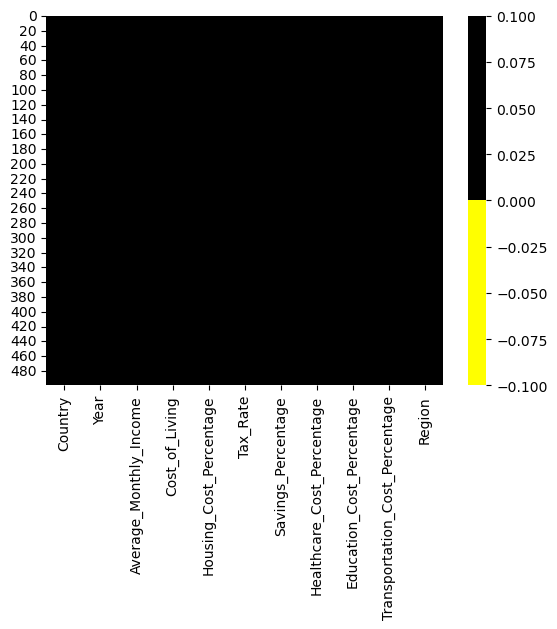

In [711]:
print(DF_LOADED.isnull().sum())  # isnull возвращает булев DataFrame


# Визуализация пропусков
sns.heatmap(DF_LOADED.isnull(), cmap= sns.color_palette(['yellow', 'black']))

Вывод:

Мы снова убедились в том, что в наших данных нет пропусков

<u>Что делать, если будут пропуски:</u>

Существует 5 способов:
- удалить всю строку, в котором есть пропуск

In [712]:
# DF_LOADED = DF_LOADED.dropna() 
# DF_LOADED

- удаление некоторых строк с пропусками

Этот метод основывается на том, что ты заранее определеяешь какая строка с пропусками допустима, а какая нет. 

Например:

Строка более чем с одним пропуском удаляется:

In [713]:
# DF_LOADED = DF_LOADED[DF_LOADED.isnull().sum(axis= 1) > 1]
# DF_LOADED

- заполнение пустот, чем либо

Придумываем какой константой заменить пропущенное значение... 

<u>Но этот метод пораждает выбросы из-за этого, например: мощность двигателя = 0</u>

In [714]:
# DF_LOADED = DF_LOADED.fillna(0)
# DF_LOADED

- Заполнение пустот средними значениями или медианами по соответствующему значению

Средние значения не устойчивы к выбросам

In [715]:
# DF_LOADED = DF_LOADED.fillna(DF_LOADED.median())
# DF_LOADED

- Заполнение пустот методом k- ближайших соседей (KNN)

Для объекта с пустым значением находиться k наиболее похожих объектов.(*похожесть измеряется с помощью растояния между точками)

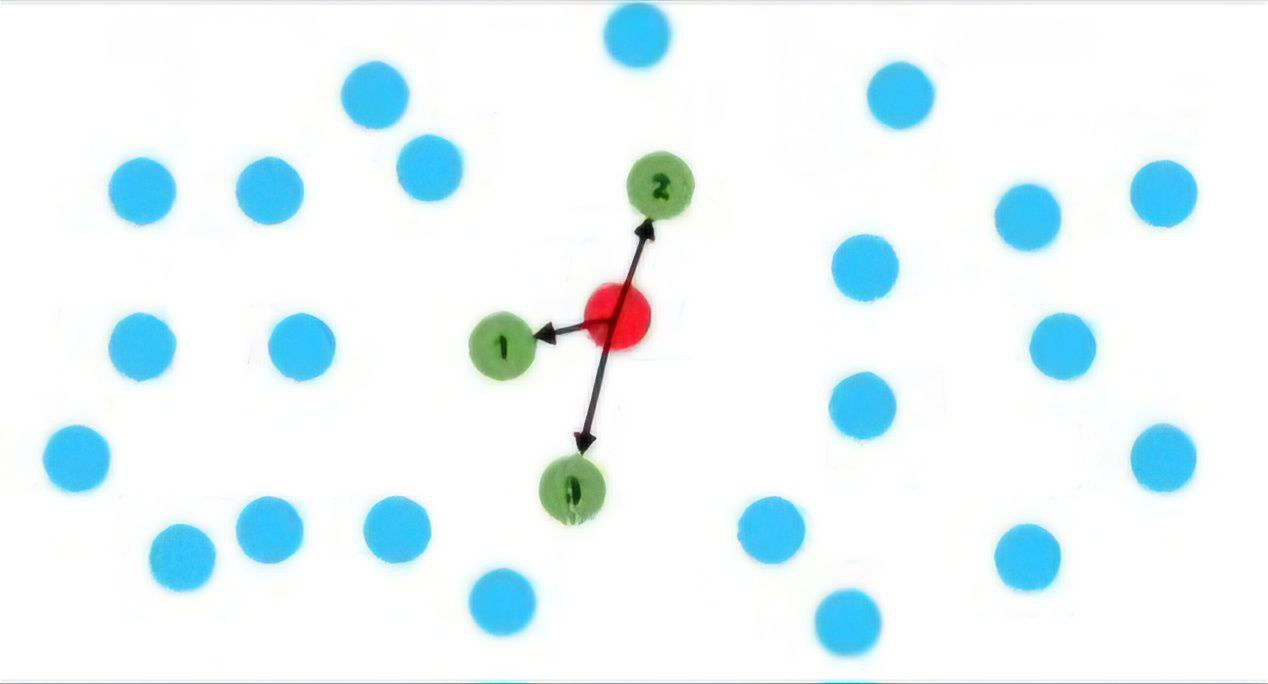

Виды расчета расстояний:

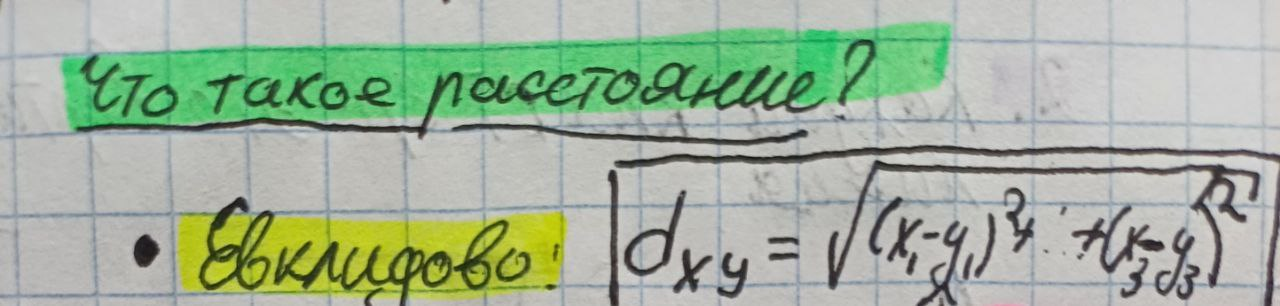

(*еще есть квадрат Евклидово)

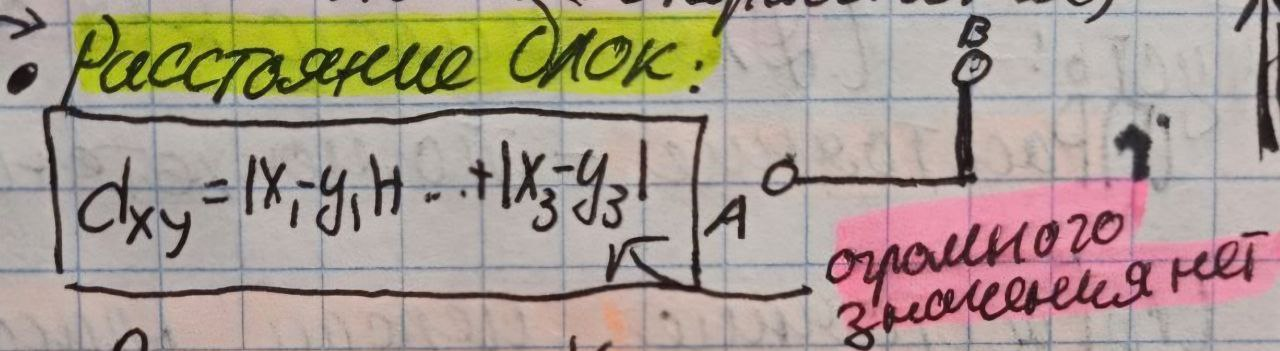
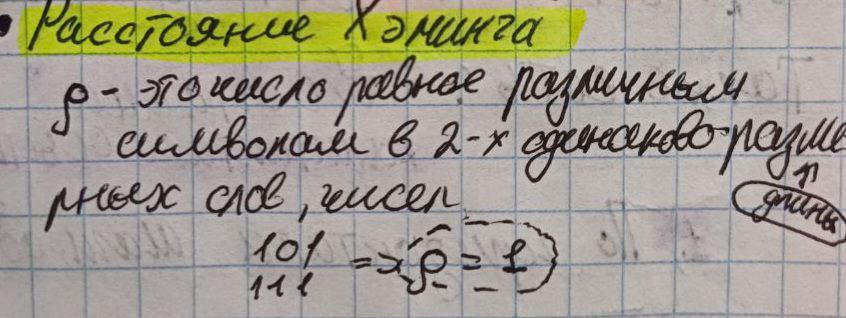

In [716]:
df_num = DF_LOADED.select_dtypes(('int64', 'float64'))
print(df_num.shape, DF_LOADED.shape)

imputer = KNNImputer(n_neighbors= 3, weights= 'uniform') # кол-во соседей,  веса = что каждый объект из соседних одинаково влияет

# обчение на основе нашего DataFrame
imputer.fit(df_num)
# импьютер — это инструмент или метод, используемый для заполнения пропущенных значений в наборе данных.

#заполним пропуски
df_num = pd.DataFrame(data= imputer.transform(df_num),
                      index= df_num.index,
                      columns= df_num.columns)
df_num

(500, 9) (500, 11)


Year  Average_Monthly_Income  Cost_of_Living  Housing_Cost_Percentage  \
0    2013.0                 3483.92         1106.07                    32.09   
1    2019.0                 7771.03         5422.78                    25.21   
2    2004.0                 6991.30         3972.36                    40.85   
3    2011.0                 6628.04         6755.75                    30.38   
4    2015.0                 2434.27         2656.36                    49.27   
..      ...                     ...             ...                      ...   
495  2007.0                 5238.60         6129.17                    25.25   
496  2004.0                 2448.53         5719.11                    45.67   
497  2003.0                 5255.04         5614.20                    26.82   
498  2023.0                 4549.89         2410.88                    45.11   
499  2005.0                 6348.84          934.07                    28.38   

     Tax_Rate  Savings_Percentage  Healthcare_Cost_Percentage  \
0       27.50                1.74                       18.23   
1       29.30                3.35                       17.21   
2       22.94               15.48                       15.28   
3       15.69                8.03                        6.66   
4       12.44               25.06                        9.34   
..        ...                 ...                         ...   
495     29.96                4.78                       15.87   
496     11.97                4.81                        6.67   
497     36.16                2.11                       14.12   
498     15.06                5.57                        9.22   
499     17.87               19.93                        7.60   

     Education_Cost_Percentage  Transportation_Cost_Percentage  
0                         6.94                           17.19  
1                        12.42                            9.90  
2                         7.10                            9.59  
3                        11.76                           11.04  
4                         3.63                           15.09  
..                         ...                             ...  
495                       7.77                           15.88  
496                       8.91                            6.69  
497                      13.36                           11.12  
498                      14.94                           18.30  
499                       9.58                            5.71  

[500 rows x 9 columns]

### 3. Поиск и обработка выбросов (аномалий)

### a) Обнаружение выбросов с использованием визуализации данных

"Ядерная оценка" плотности для стоимости жизни и среднемесячеого дохода в различных регионах мира
Ядерная оценка плотности является задачей сглаживания данных, когда делается заключение о совокупности, основываясь на конечных выборках данных

<u>Пояснение построения графика:</u>
Ядерная оценка плотности, очень схожа с гистограмма отличается тем, что она более гладкая и строиться не на блоках, как гистограмма, а на "бугорках", и каждый "бугорок" складывается с другим, но их расположение,в отличие от блоков, находится четко над величиной

<b><u>Формула ядерной оценки плотности</u></b>

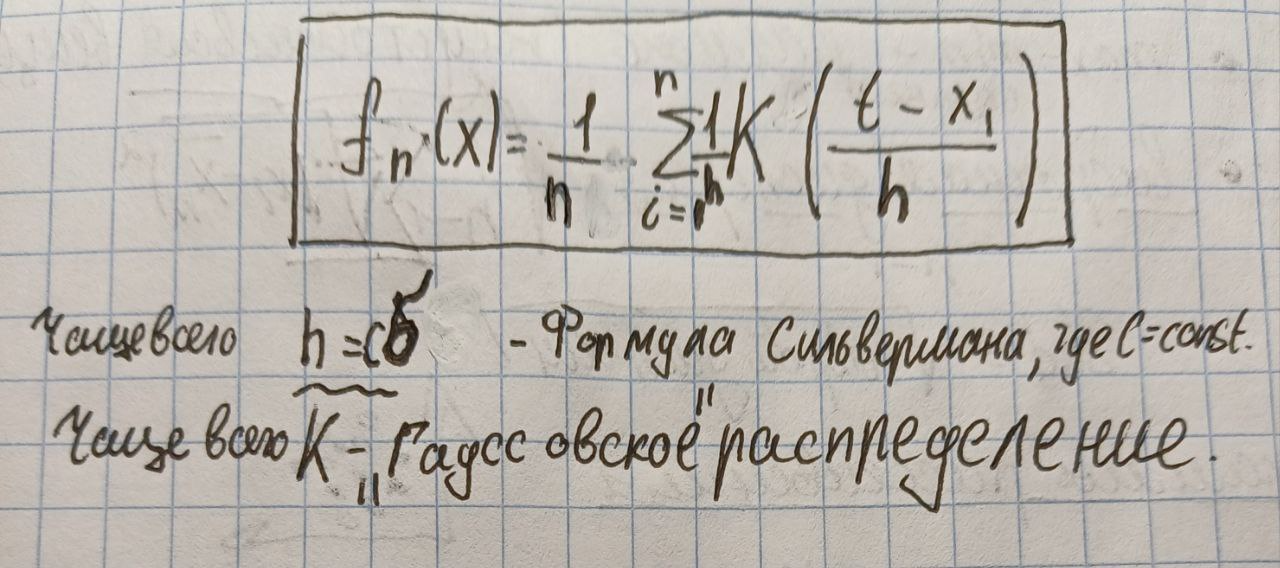

- K — ядро предлагаемой оценки;
- h — ширина окна или параметр сглаживания, который оказывает существенное влияние на вид и точность оценок; 
- n — объём наблюдений.

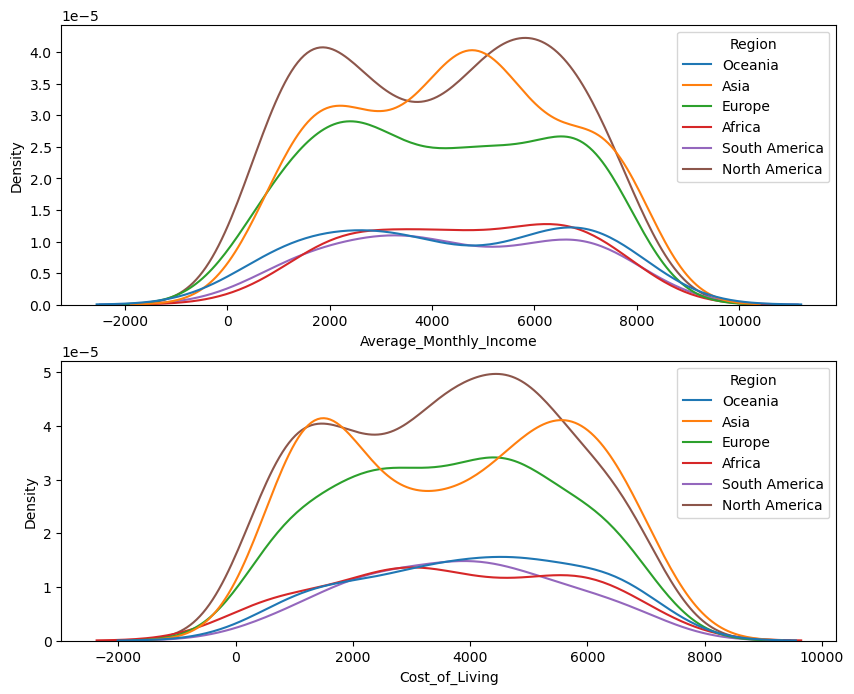

In [717]:
# для среднемесячного дохода построим ядерную плотность для каждого региона график слева, аналогично для стоимости жизни график справа
AVG_MI = 'Average_Monthly_Income'
COST_L = 'Cost_of_Living'

def kde_graphs(column, ax):
    sns.kdeplot(data= DF_LOADED, x= column, hue= 'Region', fill= False, ax= ax)
    
fig, axs = plt.subplots(nrows= 2,ncols= 1,figsize= (10, 8))
kde_graphs(AVG_MI, axs[0])
kde_graphs(COST_L, ax= axs[1])

Вывод:

Данная диаграмма лучше, чем boxplot,т.к она отображает двойные "бугорки", которые изображены на графиках выше

На предоставленных графиках KDE для среднего ежемесячного дохода и стоимости жизни мы видим несколько признаков, которые могут указывать на наличие выбросов:

- Длинные хвосты: некоторые кривые имеют длинные хвосты, тянущиеся в сторону больших значений. Это указывает на то, что в данных есть значения, значительно превышающие средние. Например, в случае со средним ежемесячным доходом длинный хвост графика для Океании может свидетельствовать о наличии высокооплачиваемых профессий или крайне неравномерном распределении доходов. Аналогично для стоимости жизни: длинные хвосты могут означать наличие очень дорогих регионов внутри региона.

- Отсутствие симметрии: большинство кривых KDE несимметричны. Это характерно для распределений с выбросами или асимметричных распределений в целом (например, распределение Парето). Симметричная кривая KDE, как правило, свидетельствует о симметричном распределении данных без выбросов.

- Отдельные второстепенные пики: хотя на этих графиках нет явно выраженных отдельных второстепенных пиков, наличие такого пика могло бы указывать на группу выбросов или на наличие второй, скрытой популяции в данных.

Ограничения:
Важно отметить, что KDE-графики не являются окончательным методом обнаружения выбросов. Они лишь подсказывают о возможном их наличии. Для точной идентификации и обработки выбросов необходимо выполнить дополнительный статистический анализ (например, с помощью метода межквартильного размаха (IQR) или z-оценки) с использованием исходных данных. KDE-графики лишь дают визуальное представление о плотности вероятности, и на них могут быть не заметны небольшие группы выбросов, которые теряются на общем фоне.


### b) Используем класстерный анализ для обноружения выбросов в данных

1.Для начал найдем с помошью дендаграммы и метода WARD количество класстеров в наших данных

2.Далее нам надо построить график scaterplot на основе новых данных, к которым добился столбец определяющий к какому класстеру данный объект относиться

3.И последний шаг обучить модель и нахождение выбросов с помощью него(обучение с помошью DBSCAN)

1. Нахождение количество класстеров

При использовании метода Уорда в иерархической кластеризации через linkage() в SciPy необходимо использовать евклидово расстояние. Это требование обусловлено тем, что метод Уорда основан на минимизации внутрикластерной дисперсии и требует соответствующей метрики для корректного выполнения своих расчетов.

[[1.51000000e+02 2.82000000e+02 4.15800433e+00 2.00000000e+00]
 [3.55000000e+02 4.12000000e+02 1.57128769e+01 2.00000000e+00]
 [1.40000000e+02 1.87000000e+02 1.65964936e+01 2.00000000e+00]
 ...
 [9.92000000e+02 9.95000000e+02 3.46541673e+04 2.76000000e+02]
 [9.91000000e+02 9.94000000e+02 3.93166058e+04 2.24000000e+02]
 [9.96000000e+02 9.97000000e+02 5.38410356e+04 5.00000000e+02]]


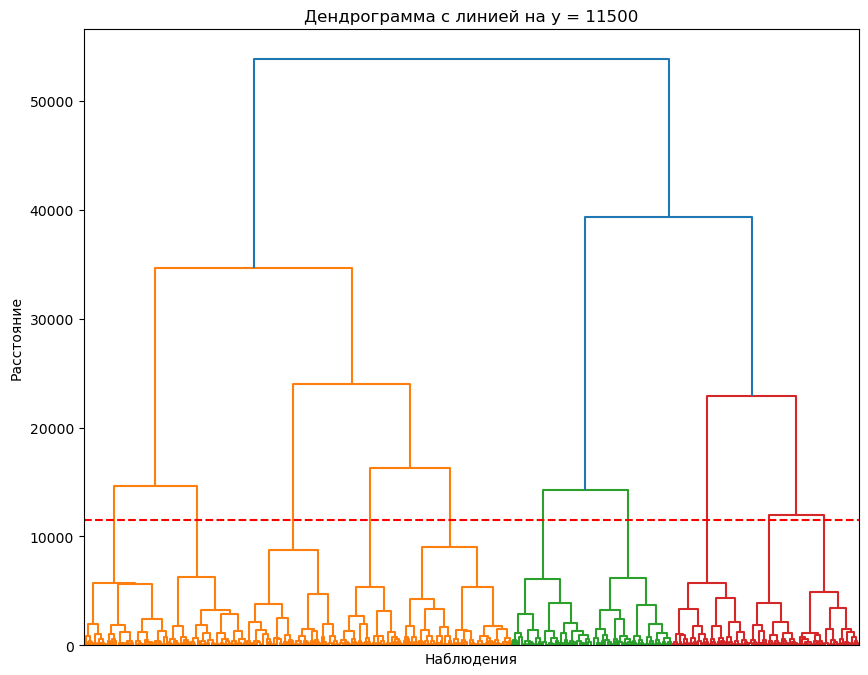

In [718]:
# построим дендаграмму 

df_for_cluster_analyse = DF_LOADED[['Region', AVG_MI, COST_L]].copy()
columns = [AVG_MI, COST_L]


plt.figure(figsize= (10, 8))
link = linkage(df_for_cluster_analyse[columns], method= 'ward')# выбрал расстояние между объектами, как расстояние блока, а расстояние между класстерами, как метод ближайшего соседа
print(link)
# строим дендаграмму
den = dendrogram(link)
plt.axhline(y=11500, color='r', linestyle='--')  # Красная пунктирная линия
plt.title('Дендрограмма с линией на y = 11500')
 # Убираем метки по оси X
plt.xticks([])  # Убираем метки индексов наблюден
plt.xlabel('Наблюдения')
plt.ylabel('Расстояние')
plt.show()

Вывод:

На этом граффике можно посчитать количество класстеров в наших данных: 
- посчитав,я получил ровно 10 класстеров

<u>Внимание: цветовой политре нельзя доверять, т.к. она не отображает класстеры</u>

2. Строим scatterplot на основе новых данных

Далее исполузуем fcluster для того, чтобы определить к какому класстеру объект относиться

In [719]:
df_for_cluster_analyse['cluster'] = fcluster(link, 10, criterion= 'maxclust')
print(df_for_cluster_analyse.loc[:,'cluster'].unique())
df_for_cluster_analyse.head(10)

[ 9  3  1  8  6  2  4  5  7 10]


Region  Average_Monthly_Income  Cost_of_Living  cluster
0        Oceania                 3483.92         1106.07        9
1           Asia                 7771.03         5422.78        3
2         Europe                 6991.30         3972.36        1
3         Africa                 6628.04         6755.75        3
4  South America                 2434.27         2656.36        8
5        Oceania                 1781.66         4575.30        6
6           Asia                 5514.82         6551.39        3
7           Asia                 7470.32         1076.56        2
8        Oceania                 4675.72         6585.71        4
9         Europe                 4787.10         4940.05        5

Вывод:

Как можно увидеть в резельтирующем DataFrame нам удалось разбить наши объекты на 10 класстеров 

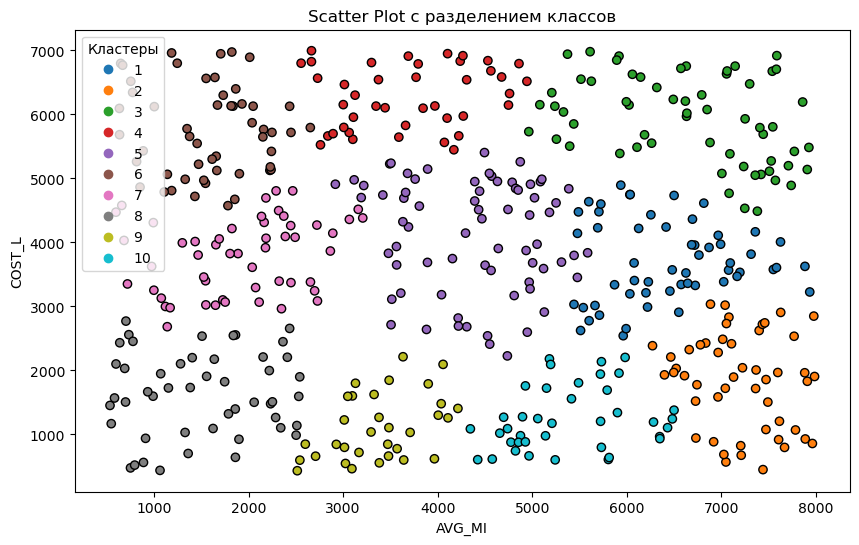

In [720]:
# Построение scatter plot
plt.figure(figsize=(10, 6))

colors = [
    'red',             # Красный
    '#90EE90',        # Светло-зеленый
    'yellow',          # Желтый
    'orange',          # Оранжевый
    'cyan',            # Голубой
    'pink',            # Розовый
    'purple',          # Фиолетовый
    'black',           # Черный
    '#32CD32',        # Ядовито-зеленый (LimeGreen)
    '#006400'         # Темно-зеленый (DarkGreen)
]

# Используем разные цвета для каждого кластера
scatter = plt.scatter(df_for_cluster_analyse[AVG_MI], 
                      df_for_cluster_analyse[COST_L], 
                      c=df_for_cluster_analyse['cluster'], 
                      cmap=plt.get_cmap('tab10', len(colors)),  # Используем цветовую карту с ограничением по количеству цветов
                      edgecolor='k')  # Цвет границы точек

plt.title('Scatter Plot с разделением классов')
plt.xlabel('AVG_MI')
plt.ylabel('COST_L')

# Добавление легенды
plt.legend(*scatter.legend_elements(), title="Кластеры")

plt.show()

3. Обучение модели DBSCAN и нахождение выбросов с помощью этой модели
Данная модель работает таким образом:
Она смотрит на то сколько объектов входят в окружность и если входит мало объектов, то данный объект является шумом, а если достаточно, то является ядровым объектом и теперь относительно него будут строиться другие "ядровые объекты". Еще есть граничные объекты- это те которые находяться в пределах eps от ядровых объектов, но в их радиус не входит достаточно объектов, чтобы они были ядровыми
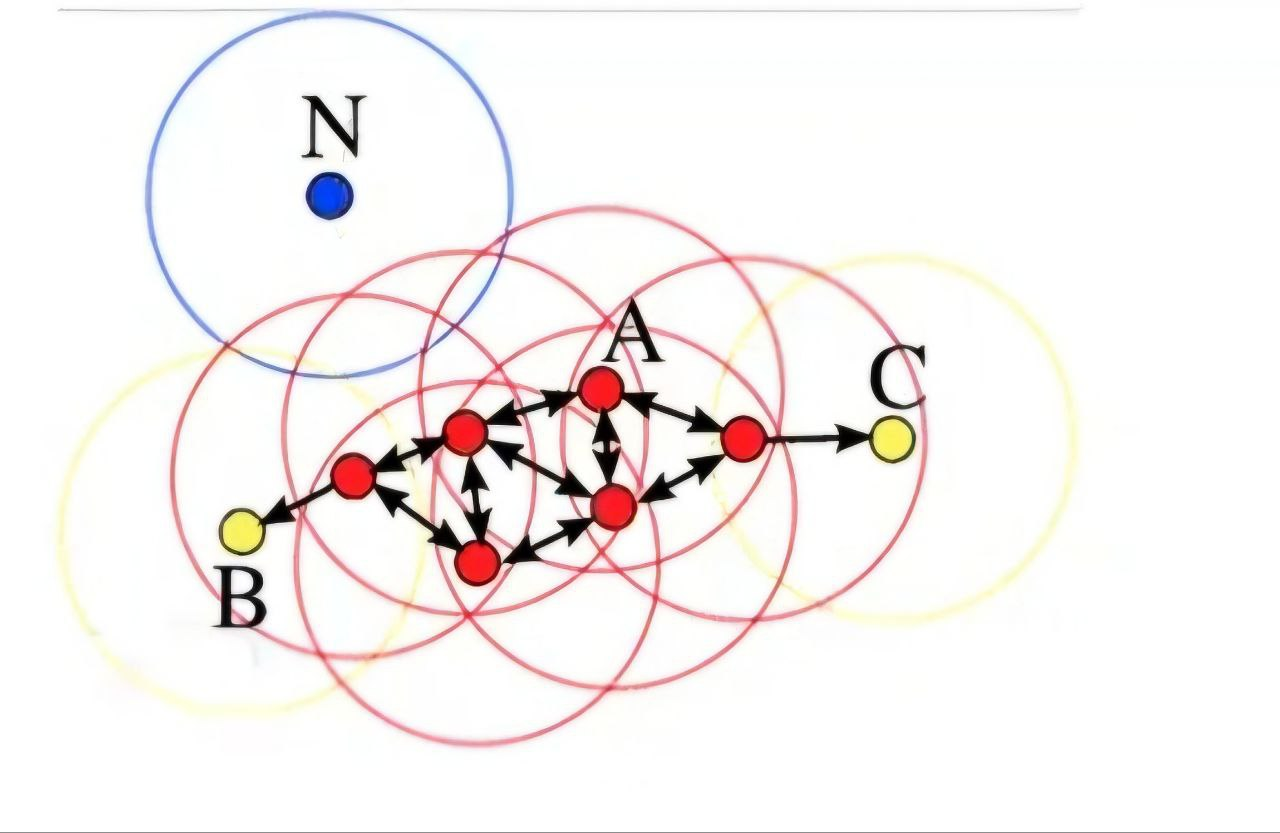


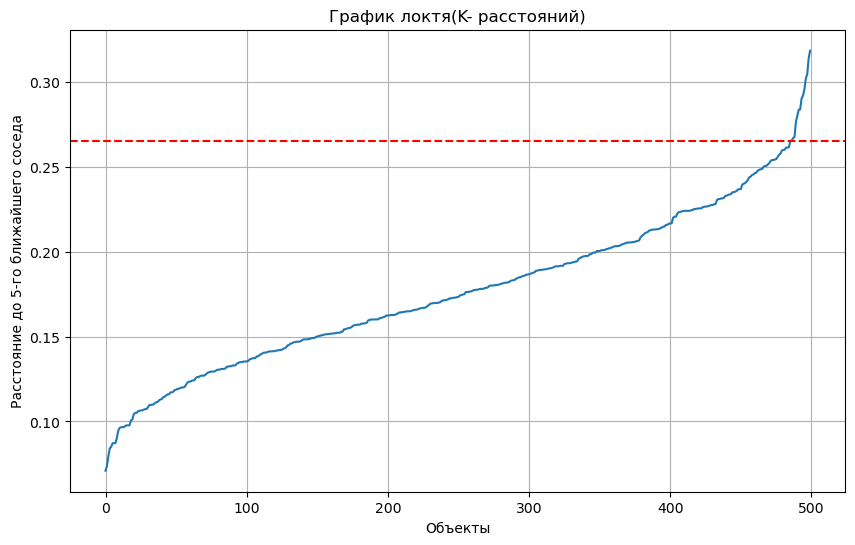

In [721]:
### Для начала стандартизуем данные, чтобы избежать влияния размерностей
X = DF_LOADED[AVG_MI]
Y = DF_LOADED[COST_L]
mx, sx = X.mean(), X.std()
my, sy = Y.mean(), Y.std()
Xs = (X - mx) / sx
Ys = (Y - my) / sy

from sklearn.neighbors import NearestNeighbors

# Определение min_samples
min_samples = 5  # Можно начать с 5 или больше
data = pd.DataFrame({'Xs': Xs, 'Ys': Ys})

# Построение графика K-расстояний для определения eps
neighbors = NearestNeighbors(n_neighbors=min_samples)

# обучение модели на основе данных data
neighbors_fit = neighbors.fit(data)

distances, indices = neighbors_fit.kneighbors(data)
# Метод kneighbors() возвращает два массива:
# distances: расстояния до ближайших соседей.
# indices: индексы этих соседей.

# Сортировка расстояний до ближайших соседей для крассивого графика
distances = np.sort(distances[:, min_samples - 1], axis=0)

# Построение графика
plt.figure(figsize=(10, 6))

plt.plot(distances)
plt.axhline(y=0.265, color='red', linestyle='--')  # Добавляем горизонтальную линию на уровне 0.27
plt.title('График локтя(K- расстояний)')
plt.xlabel('Объекты')
plt.ylabel(f'Расстояние до {min_samples}-го ближайшего соседа')
plt.grid()
plt.show()



Вывод: 

Данный график помогает нам определить значение eps, т.к. точка в которой график начинает резко расти и есть это значение

Обучем модель на обучаюших данных с использованием тех знаний, которые мы получили до этого:

In [722]:
clustering = DBSCAN(eps= 0.265, min_samples= 10).fit(list(zip(Xs, Ys)))
labels = clustering.labels_
print(labels) 
# eps - это радиус круга. min_samples - минимальное количество точек в круге 

[ 0  1  2  3  2  2  3  2  3  2  0  2  2  0  2 -1  2 -1  3 -1  3  2  0  2
 -1  0  0  2  1  2  2 -1  3  2  2  4  2  2  2  2  1  2  2 -1  0  2  3  2
  1  2  2  2  2  2  2  4  4  2  2  2  2  3  0  2  2 -1 -1  2  2  0  4  3
  2  2  2  4  0  2  2  4  2  2  2  0  2 -1  2 -1  4  2  2  2  2  2  3  2
  0  2  0  0  3  4  2  2  2  2  0  0  2  4 -1  0  2  2  4  2  2 -1  2  2
  4  2  1  4  2  4  2  2  3  1  1 -1  2  2  3  2  1  2  2  2  2 -1  0  2
 -1  2 -1  3  2  0  2  2 -1  2  2  0  2  3  2  2  2  4  4  0  2  2  1  2
 -1  2  2  3  4 -1  2  2  1  2  2 -1 -1 -1  2  3 -1  2  2  2  4  2  2  2
  2  3  0  3 -1  0  2  2  2  2  2  0  2 -1  0  2  0 -1  0  2  2  2  2  2
 -1  2  2 -1  2 -1  2  0 -1 -1  2  2  2  3  2  2  2  4  0  4  0  2  3  0
  2  2  2  2  2  2  2  3 -1  0  3  2  2  2  2  2  2  0  0  2  1  0  2 -1
  4  2  2  2 -1  2 -1  3  2  2  2  2  2  0  2  2  2  0  2  2  2  0  2 -1
  0  3 -1  3  2  2  1  3  2  2  2  2  2 -1  2  2  2  2 -1  2 -1  2  2  2
  2  2  2  0  4  2  2 -1  2  2  2  2  2  2  2  2  2

Вывод:

- значения >0 означают, что это класстеры
- значения -1 означают выбросы

Построим scatterplot для визуализации на основе полученной матрицы

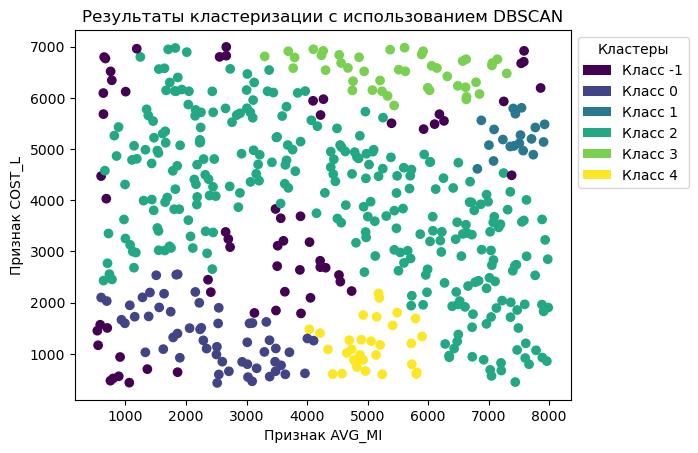

In [723]:
def print_scatterplot_for_clustering(X, Y, labels):
    scatter = plt.scatter(X, Y, c=labels, cmap='viridis')
    plt.title('Результаты кластеризации с использованием DBSCAN')
    plt.xlabel('Признак AVG_MI')
    plt.ylabel('Признак COST_L')
    
    # Создание пользовательской легенды с использованием Patch
    unique_labels = np.unique(labels)
    colors = scatter.cmap(scatter.norm(unique_labels))  # Получение цветов из colormap
    
    # Создание списка объектов Patch для легенды
    legend_elements = [Patch(facecolor=colors[i], label=f'Класс {unique_labels[i]}') for i in range(len(unique_labels))]
    
    # Добавление легенды на график
    plt.legend(handles=legend_elements, title="Кластеры", bbox_to_anchor=(1, 1))
    
    plt.show()
    
print_scatterplot_for_clustering(X, Y, labels)

Построим scatterplot без выбросов

Количество выбросов: 62


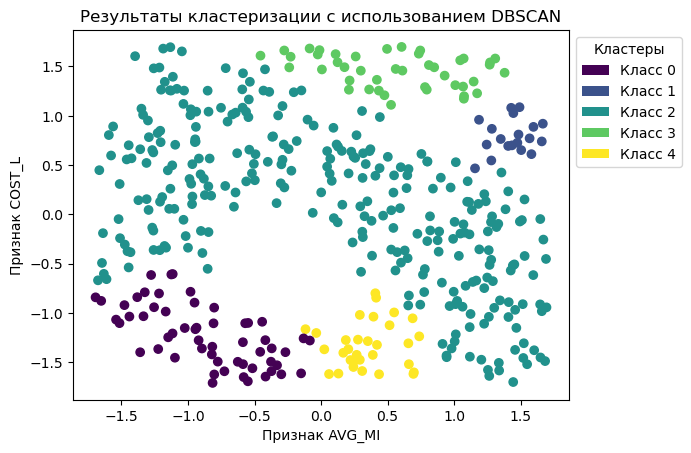

Количество объектов: 438


In [724]:
df_labels = pd.DataFrame(data= {'cluster': labels, 
                                'AVG_MI': Xs, 
                                'COST_L': Ys})

df_without_emissions = df_labels[df_labels['cluster'] != -1]
print("Количество выбросов:", len(df_labels) - len(df_without_emissions))
print_scatterplot_for_clustering(df_without_emissions['AVG_MI'], df_without_emissions['COST_L'], df_without_emissions['cluster'])
print('Количество объектов:', len(df_without_emissions))

## c) Давайте посмотрим на рост средних доходов и расходов регионов. 

И узнаем есть ли регионы у которых средние доходы меньше, чем расходы:

In [725]:
# отбрасываем данные с выбросами для более точного анализа
index_data_without_emissions = df_without_emissions.index.to_list()
print("Индексы данных без выбросов: ", index_data_without_emissions)
DF_LOADED_WITHOUT_EMISSIONS = DF_LOADED.iloc[index_data_without_emissions].copy()
print('Количество объектов', len(DF_LOADED_WITHOUT_EMISSIONS)) 

# считаем средний доход данных для каждого региона ВОСПОЛЬЗУЕМСЯ медианой, т.к она более устойчева к выбросам --> Следовательно влияние ваыбросов будет еще меньше, т.к. после 
REGION = 'Region'
mean_AVG_MI_for_everyone_region = DF_LOADED_WITHOUT_EMISSIONS.groupby(REGION)[AVG_MI].median()
mean_COST_L_for_everyone_region = DF_LOADED_WITHOUT_EMISSIONS.groupby(REGION)[COST_L].median()

bool_df = mean_COST_L_for_everyone_region > mean_AVG_MI_for_everyone_region 
bool_df

Индексы данных без выбросов:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 145, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 174, 175, 176, 177, 178, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 210, 211, 212, 213, 214, 215, 217, 218, 220, 222, 223, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,

Region
Africa           False
Asia             False
Europe           False
North America    False
Oceania          False
South America    False
dtype: bool

<u>Примечание:</u>
- значение FALSE говорит о том, что средний доход региона больше среднего расхода региона
- значение TRUE говорит об обратном 

Вывод:
Как можно заметить, что у всех регионов значение FALSE --> во всех регионах средний заработок больше средних расходов   

Давайте определим в какой стране разность этих двух показателей самая наибольшая

In [726]:
delta_save_money = mean_AVG_MI_for_everyone_region - mean_COST_L_for_everyone_region
delta_save_money.sort_values(ascending= False)

Region
Asia             1134.700
North America    1004.275
South America     909.290
Africa            895.300
Europe            740.270
Oceania           563.300
dtype: float64

Вывод:

По полученным данным можно сделать поспешный вывод о том, что жизнь в Азии выгоднее, чем в других регионах

НО:
Давайте посмотрим на суммы, которые остаются у людей на руках после совершения трат(траты для проживания в данных регионах)

In [727]:
SAVINGS_PERCENTAGE = "Savings_Percentage"
save_money_for_everyone_counry = pd.DataFrame(DF_LOADED_WITHOUT_EMISSIONS['Region'])
save_money_for_everyone_counry['save_money'] = DF_LOADED_WITHOUT_EMISSIONS.loc[:, AVG_MI] * DF_LOADED_WITHOUT_EMISSIONS.loc[:,SAVINGS_PERCENTAGE].apply(lambda x: x / 100)

save_money_for_everyone_region = save_money_for_everyone_counry.groupby(REGION)['save_money'].mean().apply(lambda x: round(x, 2))
save_money_for_everyone_region.sort_values(ascending= False)

Region
Oceania          768.22
Africa           715.45
Asia             685.47
Europe           662.29
North America    649.90
South America    618.43
Name: save_money, dtype: float64

Вывод:

Здесь Азия уже находиться на 3 месте его опережают Океания и Африка, причем самое удивительное, что в первых полученных данний Океания стоит на последнем месте. В дальнейшем мы сделаем вывод из-за чего так вышло

Построим графики, где будет изображено изменения стоимости жизни и среднемесячного дохода в различных регионах мира.(будем использовать median вместо mean, т.к. median более устойчева к выбросам)
И также посторим корреляционную матрицу.

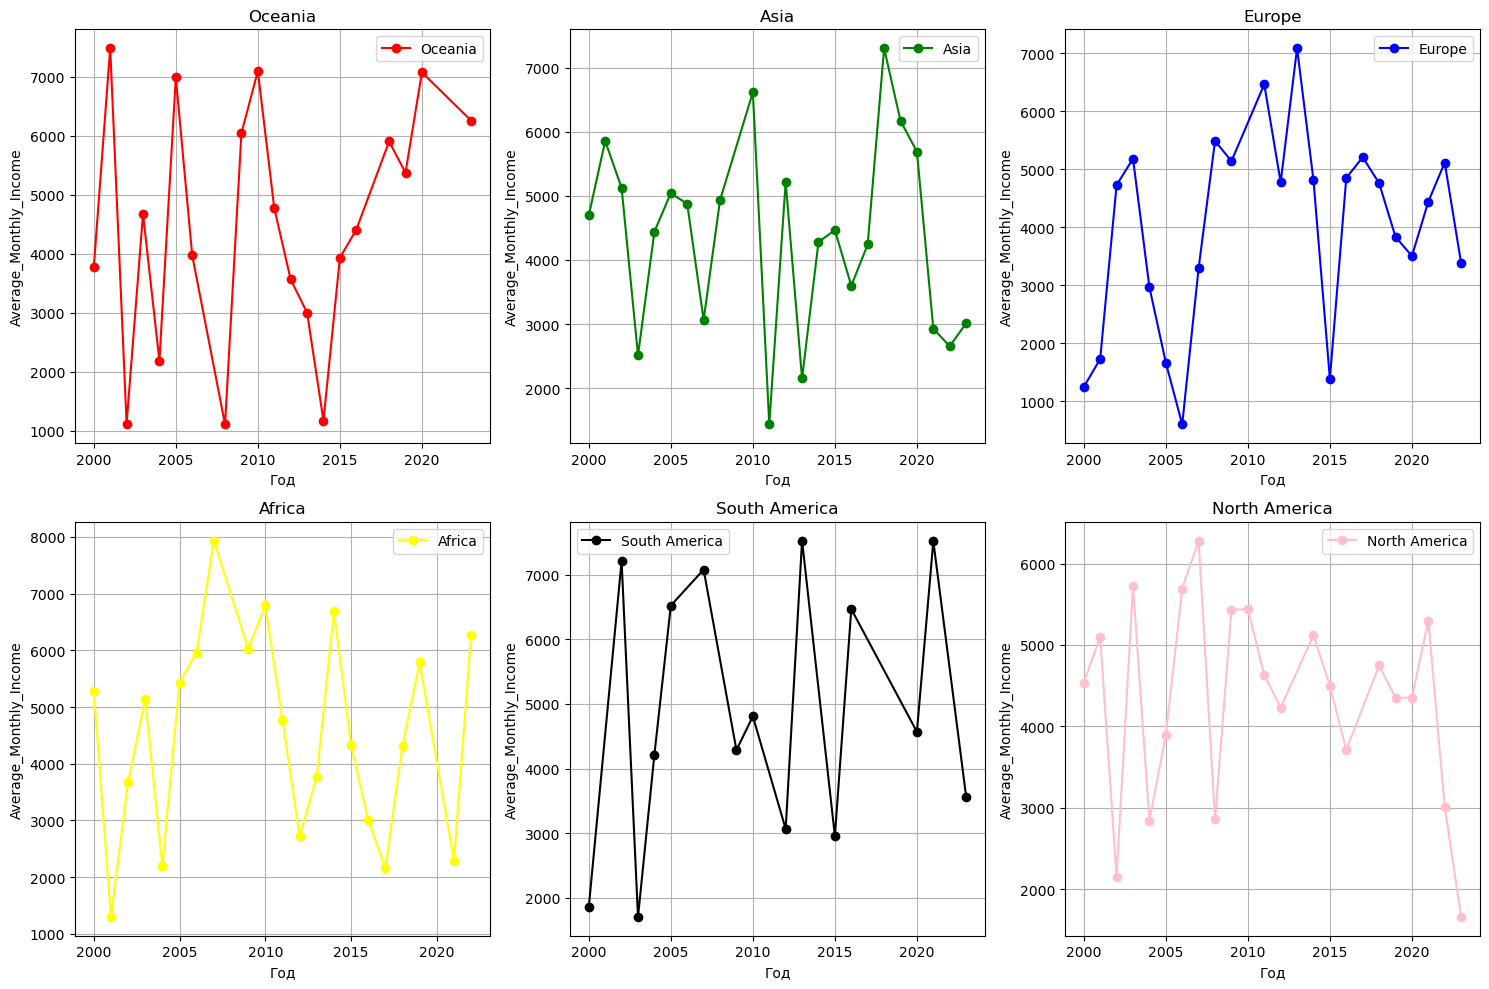

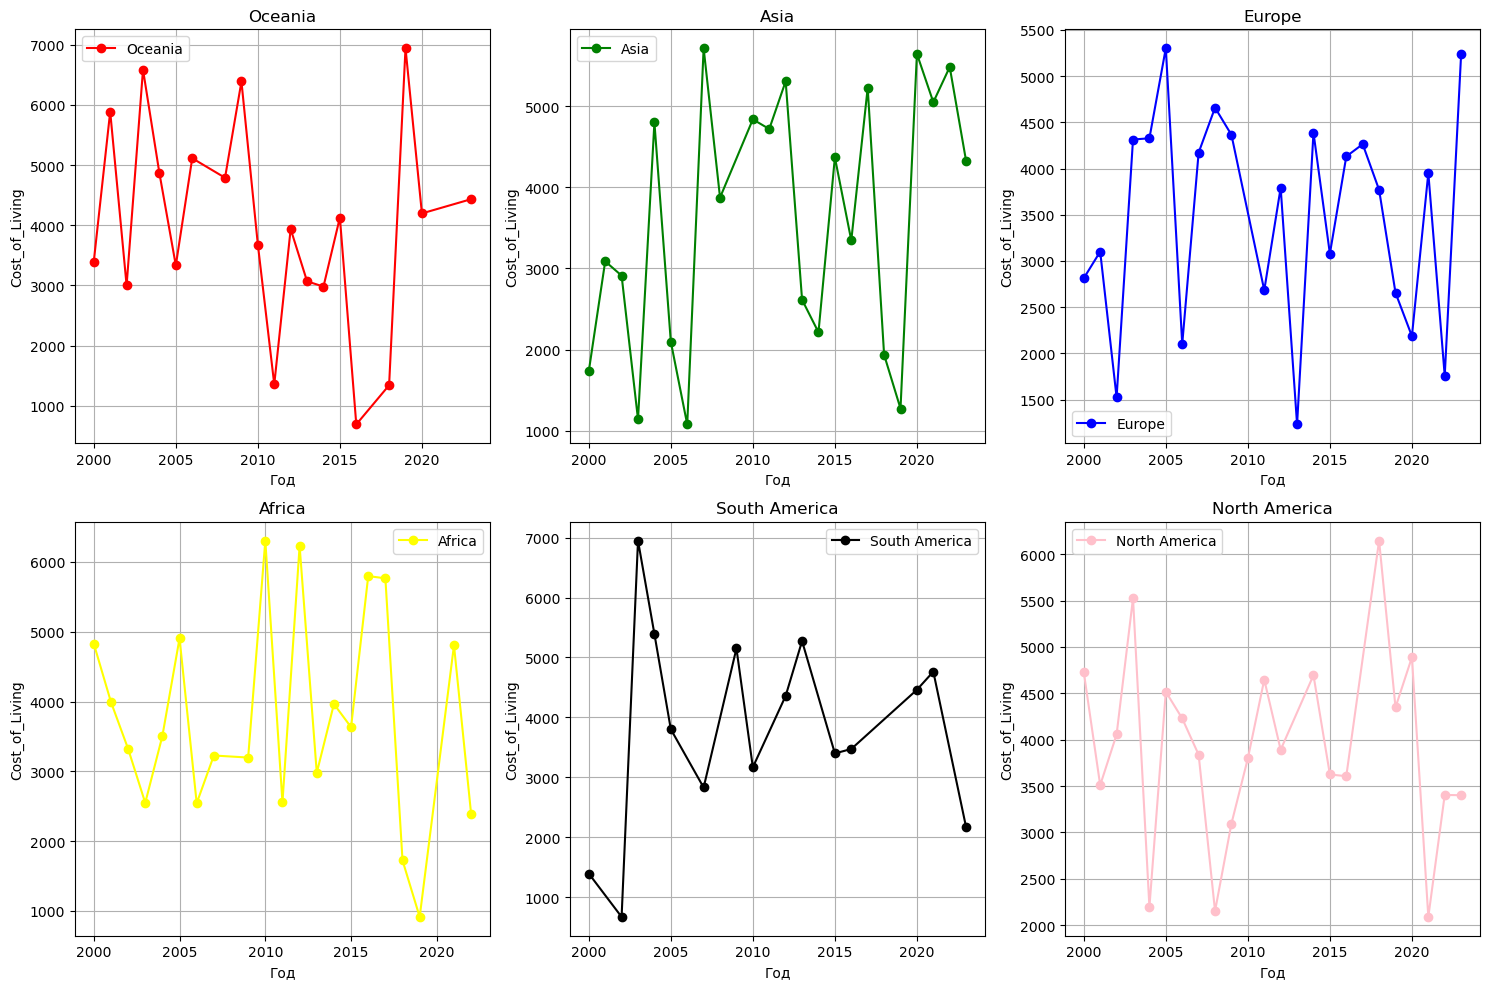

Коэффициент корреляции: 0.687889353004373


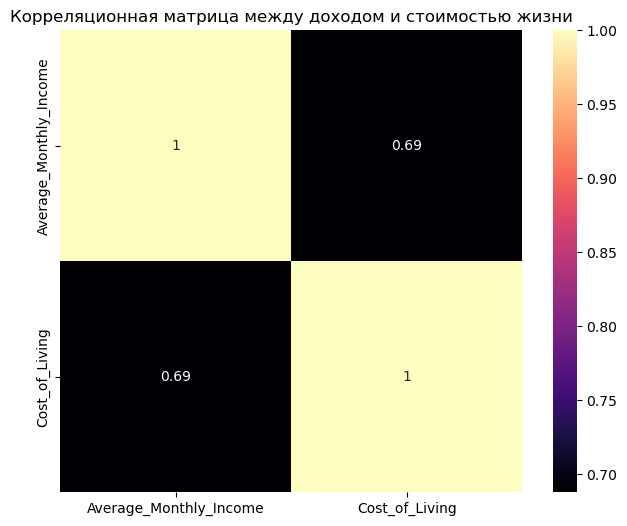

In [728]:
#СТОИМ ГРАФИКИ
def print_plots(column_name, number_cols= 3, func= 'mean'):
    """_
    Функция строить графики на основе переданных параметров, а именно предназначены  для построения графиков изменения стоимости жизни и среднемесячного дохода в зависимости от региона, т.е. для каждого региона в DF_LOADED_WITHOUT_EMISSIONS генерируется свой график

    Args:
        column_name (_type_): _description_
        number_cols (int, optional): _description_. Defaults to 3.
        func (str, optional): _description_. Defaults to 'mean'.
    """
    
    ALL_REGIONS = DF_LOADED_WITHOUT_EMISSIONS[REGION].unique().tolist()
    number_rows = len(ALL_REGIONS) // number_cols if len(ALL_REGIONS) % number_cols == 0 else len(ALL_REGIONS) // number_cols + 1
    fig, axs = plt.subplots(nrows= number_rows, ncols= number_cols, figsize=(15, 5 * number_rows))
    
    colors = [color, 'green', 'blue', 'yellow', 'black', 'pink'] 
    
    for index, region in enumerate(ALL_REGIONS):
        region_data = DF_LOADED_WITHOUT_EMISSIONS[DF_LOADED_WITHOUT_EMISSIONS['Region'] == region]
        
        avg_income_per_year = region_data.groupby('Year')[column_name].agg(func).reset_index()
        
        ax = axs[index // number_cols, index % number_cols]
        ax.plot(avg_income_per_year['Year'], avg_income_per_year[column_name], marker='o', label=region, color= colors[index % (number_cols * number_rows)])
        
        ax.set_title(region)
        ax.set_xlabel('Год')
        ax.set_ylabel(column_name)
        ax.grid(True)
        ax.legend()
    
    # Автоматическая настройка расположения графиков
    plt.tight_layout()
    plt.show()
    
print_plots(AVG_MI, func= 'median')
print_plots(COST_L, func= 'median')

# СТРОИМ КОРРЕЛЯЦИОННУЮ МАТРИЦУ
grouped_data = DF_LOADED_WITHOUT_EMISSIONS.groupby('Region').agg({
    AVG_MI: 'median',  # Используем переменную AVG_MI
    COST_L: 'median'   # Используем переменную COST_L
}).reset_index()

correlation = grouped_data[AVG_MI].corr(grouped_data[COST_L])

print(f'Коэффициент корреляции: {correlation}')

correlation_matrix = grouped_data[[AVG_MI, COST_L]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', square=True)
plt.title('Корреляционная матрица между доходом и стоимостью жизни')
plt.show()

Вывод:

Графики: графики медиан показывают динамику среднего ежемесячного дохода (AVG_MI) и стоимости жизни (COST_L) для каждого региона с течением времени. Они дают более стабильное представление по сравнению с графиками средних значений, так как медиана устойчива к выбросам. Визуально видно, что в некоторых регионах наблюдаются довольно значительные колебания как доходов, так и стоимости жизни.

Корреляционная матрица: коэффициент корреляции Пирсона между медианой среднего ежемесячного дохода и медианой стоимости жизни (около 0,69) указывает на умеренную положительную корреляцию. Это означает, что в целом в регионах с более высоким средним доходом, как правило, выше и стоимость жизни. Тепловая карта подтверждает это, демонстрируя положительную корреляцию между двумя переменными.

На основе полученных данных и графиков можно сделать следующие выводы:

- Существует умеренная положительная корреляция между средним ежемесячным доходом и стоимостью жизни: регионы с более высоким доходом, как правило, имеют и более высокую стоимость жизни. Это ожидаемый результат.
- Динамика доходов и стоимости жизни во времени различна для разных регионов: графики показывают, что изменения доходов и стоимости жизни имеют специфические особенности для каждого региона, что говорит о влиянии различных факторов, характерных для каждого региона.
- Использование медианы для агрегирования данных является предпочтительным: поскольку медиана устойчива к выбросам, её использование для построения графиков и вычисления корреляции обеспечивает более надёжную и представительную оценку, чем использование среднего арифметического.

### Выводы об изменении стоимости жизни и среднемесячного дохода для каждого региона (относительно полученных граффиков): 
Океания: графики показывают умеренные колебания как среднего дохода, так и стоимости жизни. Ярко выраженных тенденций роста или падения нет. Колебания, по-видимому, носят случайный характер или обусловлены скрытыми факторами, не представленными в данных.

Азия: графики демонстрируют колебания, но с несколько более выраженной тенденцией <u> к росту стоимости жизни</u> по сравнению с ростом доходов.

Европа: Наблюдаются заметные колебания как в доходах, так и в стоимости жизни. Заметных тенденций роста или падения нет.

Африка: графики показывают значительные колебания, причем <u>колебания стоимости жизни более резкие</u>, чем колебания доходов.

Южная Америка: <u>значительные колебания</u> как в доходах, так и в стоимости жизни.

Северная Америка: наблюдаются колебания, но, по-видимому, более сглаженные, чем в других регионах. Есть некоторое <u>ощущение роста как доходов, так и стоимости жизни</u>.


# Этап 3

# Сравним экономические показатели России, Америки, Японии и Франции (Russia, United States, France, Japan)

In [729]:
choices_countries_without_emissions = DF_LOADED_WITHOUT_EMISSIONS[DF_LOADED_WITHOUT_EMISSIONS['Country'].isin(['Russia', 
                                                                                                               'France',
                                                                                                               'United States',
                                                                                                               'Japan'])].copy()
# Не большая проверочка
print("В анализе участвуют страны: ", choices_countries_without_emissions['Country'].unique().tolist())
print("Столбцы в наших данных:")
choices_countries_without_emissions.columns.values.tolist()

В анализе участвуют страны:  ['Russia', 'Japan', 'United States', 'France']
Столбцы в наших данных:


['Country',
 'Year',
 'Average_Monthly_Income',
 'Cost_of_Living',
 'Housing_Cost_Percentage',
 'Tax_Rate',
 'Savings_Percentage',
 'Healthcare_Cost_Percentage',
 'Education_Cost_Percentage',
 'Transportation_Cost_Percentage',
 'Region']

Определим какие параметры будут важны для сравнения экономических показателей этих стран

Пойдем по столбцам:
- страна: данную клонка содержит качественный данные, если в дальнейшем нам прийдется использовать методы машинного обучения, то переведем данные в количественный тип. Эта колонка нужна для определения страны наблюдаемого объекта, поэтому оставляем его
- регион: регион нам не нужен, так как мы рассматриваем страны
- год: может пригодиться для анализа временных рядов
- среднемесячный доход: содержимое данных очень важно для нашего сравнения
- стоимость жизни: тоже очень важный параметр
- процент расходов на жилье: этот показатель не менее важен, чтобы осознавать в какой стране приходиться отдавать большую сумму за свое существование
- Налоговая ставка: ну тоже важная характеристика. Отвечает за то какими доходами мы располагаем:
Располагаемый доход = доход - доход * (налоговая ставка) / 100
- процент сбережений: ну а этот показатель говорит сколько денег остается у жителей, поэтому важный параметр
- процент расходов на медицинскую_помощь: важный показатель
- процент расходов на образование: показывает на сколько люди хотят быть образованными и готовы вкладываться в образование
- Процент транспортных расходов: показатель, который с одной стороны можно пропустить, но он не менее важен для нащего сравнения 

In [730]:
choices_countries_without_emissions.drop('Region', axis= 1, inplace= True)
choices_countries_without_emissions

Country  Year  Average_Monthly_Income  Cost_of_Living  \
2           Russia  2004                 6991.30         3972.36   
7            Japan  2006                 7470.32         1076.56   
9           Russia  2000                 4787.10         4940.05   
10          Russia  2004                 2599.84          847.72   
16           Japan  2001                 2318.07         4498.04   
..             ...   ...                     ...             ...   
485  United States  2022                 3013.39         6467.99   
490          Japan  2022                 4306.01         6541.93   
493          Japan  2002                 5126.95         2912.11   
496         France  2004                 2448.53         5719.11   
499  United States  2005                 6348.84          934.07   

     Housing_Cost_Percentage  Tax_Rate  Savings_Percentage  \
2                      40.85     22.94               15.48   
7                      23.98     27.86               10.12   
9                      47.68     35.49                3.73   
10                     34.61     31.81               12.41   
16                     24.39     24.62               13.92   
..                       ...       ...                 ...   
485                    30.57     12.55                9.03   
490                    23.79     27.81                3.16   
493                    40.59     27.57               19.66   
496                    45.67     11.97                4.81   
499                    28.38     17.87               19.93   

     Healthcare_Cost_Percentage  Education_Cost_Percentage  \
2                         15.28                       7.10   
7                         12.73                      10.81   
9                         10.35                      14.08   
10                        10.31                       7.04   
16                         9.90                       5.05   
..                          ...                        ...   
485                        5.75                       9.14   
490                        7.41                       3.23   
493                        8.56                       4.30   
496                        6.67                       8.91   
499                        7.60                       9.58   

     Transportation_Cost_Percentage  
2                              9.59  
7                              7.00  
9                              6.92  
10                            13.68  
16                            15.95  
..                              ...  
485                           11.91  
490                           17.58  
493                           10.44  
496                            6.69  
499                            5.71  

[145 rows x 10 columns]

Проведем стандартизацию данных

In [731]:
X_standardized = choices_countries_without_emissions.iloc[:, :2].copy()
for column in choices_countries_without_emissions.columns.values[2:]:
    X = choices_countries_without_emissions[column]
    X: pd.Series
    X_standardized[column] = (X - X.mean()) / X.std()
X_standardized.describe()

Year  Average_Monthly_Income  Cost_of_Living  \
count   145.000000            1.450000e+02    1.450000e+02   
mean   2011.717241            6.737905e-17   -1.868237e-16   
std       6.850287            1.000000e+00    1.000000e+00   
min    2000.000000           -1.731951e+00   -1.686590e+00   
25%    2006.000000           -9.478800e-01   -8.257740e-01   
50%    2012.000000            1.138854e-01    7.704333e-02   
75%    2018.000000            8.146201e-01    7.138945e-01   
max    2023.000000            1.695925e+00    1.690675e+00   

       Housing_Cost_Percentage      Tax_Rate  Savings_Percentage  \
count             1.450000e+02  1.450000e+02        1.450000e+02   
mean              2.113252e-16  1.156163e-16       -8.728650e-17   
std               1.000000e+00  1.000000e+00        1.000000e+00   
min              -1.642958e+00 -1.724763e+00       -1.768804e+00   
25%              -8.463274e-01 -7.926702e-01       -8.001356e-01   
50%              -8.142143e-02  4.045671e-02       -1.906130e-02   
75%               8.656051e-01  8.968102e-01        8.325030e-01   
max               1.802057e+00  1.743065e+00        1.595386e+00   

       Healthcare_Cost_Percentage  Education_Cost_Percentage  \
count                1.450000e+02               1.450000e+02   
mean                 2.633908e-16              -2.924863e-16   
std                  1.000000e+00               1.000000e+00   
min                 -1.734563e+00              -1.697852e+00   
25%                 -8.742757e-01              -8.306285e-01   
50%                  4.890479e-02               4.472558e-02   
75%                  9.406388e-01               7.005636e-01   
max                  1.596524e+00               1.760203e+00   

       Transportation_Cost_Percentage  
count                    1.450000e+02  
mean                    -6.125368e-18  
std                      1.000000e+00  
min                     -1.697182e+00  
25%                     -9.151570e-01  
50%                      7.525861e-02  
75%                      9.401917e-01  
max                      1.592253e+00

Вывод:
Нам удалось стандартизовать данные, т.к. mean стремиться к 0, а std к 1

Посчитаем ВВП по ППС("Валовый внутренний продукт рассчитанный по паритету покупательной способности):

<u>Почему этот показатель важен при сравнении стран?</u>
- это показатель отражает сколько ресурсов есть у среднего гражданина
- более точно отражает благосостояние населения
- также более точно сравнивает экономические показатели стран и учитывает реальные условия жизни и населения

<u>Почему ВВП по ППС лучше обычного ВВП?</u>

Главная причина это то, что ВВП по ППС более устойчива к курсу валюты

In [732]:
choices_countries_without_emissions['GDP_PPP'] = (choices_countries_without_emissions[AVG_MI] * 12) / choices_countries_without_emissions[COST_L]
X_standardized['GDP_PPP'] = (choices_countries_without_emissions['GDP_PPP'] - choices_countries_without_emissions['GDP_PPP'].mean()) / choices_countries_without_emissions['GDP_PPP'].std()
X_standardized.describe()

Year  Average_Monthly_Income  Cost_of_Living  \
count   145.000000            1.450000e+02    1.450000e+02   
mean   2011.717241            6.737905e-17   -1.868237e-16   
std       6.850287            1.000000e+00    1.000000e+00   
min    2000.000000           -1.731951e+00   -1.686590e+00   
25%    2006.000000           -9.478800e-01   -8.257740e-01   
50%    2012.000000            1.138854e-01    7.704333e-02   
75%    2018.000000            8.146201e-01    7.138945e-01   
max    2023.000000            1.695925e+00    1.690675e+00   

       Housing_Cost_Percentage      Tax_Rate  Savings_Percentage  \
count             1.450000e+02  1.450000e+02        1.450000e+02   
mean              2.113252e-16  1.156163e-16       -8.728650e-17   
std               1.000000e+00  1.000000e+00        1.000000e+00   
min              -1.642958e+00 -1.724763e+00       -1.768804e+00   
25%              -8.463274e-01 -7.926702e-01       -8.001356e-01   
50%              -8.142143e-02  4.045671e-02       -1.906130e-02   
75%               8.656051e-01  8.968102e-01        8.325030e-01   
max               1.802057e+00  1.743065e+00        1.595386e+00   

       Healthcare_Cost_Percentage  Education_Cost_Percentage  \
count                1.450000e+02               1.450000e+02   
mean                 2.633908e-16              -2.924863e-16   
std                  1.000000e+00               1.000000e+00   
min                 -1.734563e+00              -1.697852e+00   
25%                 -8.742757e-01              -8.306285e-01   
50%                  4.890479e-02               4.472558e-02   
75%                  9.406388e-01               7.005636e-01   
max                  1.596524e+00               1.760203e+00   

       Transportation_Cost_Percentage       GDP_PPP  
count                    1.450000e+02  1.450000e+02  
mean                    -6.125368e-18  2.756416e-17  
std                      1.000000e+00  1.000000e+00  
min                     -1.697182e+00 -7.984766e-01  
25%                     -9.151570e-01 -6.085576e-01  
50%                      7.525861e-02 -4.115341e-01  
75%                      9.401917e-01  8.674859e-02  
max                      1.592253e+00  4.840642e+00

Посмотрим полученный результат на графике:

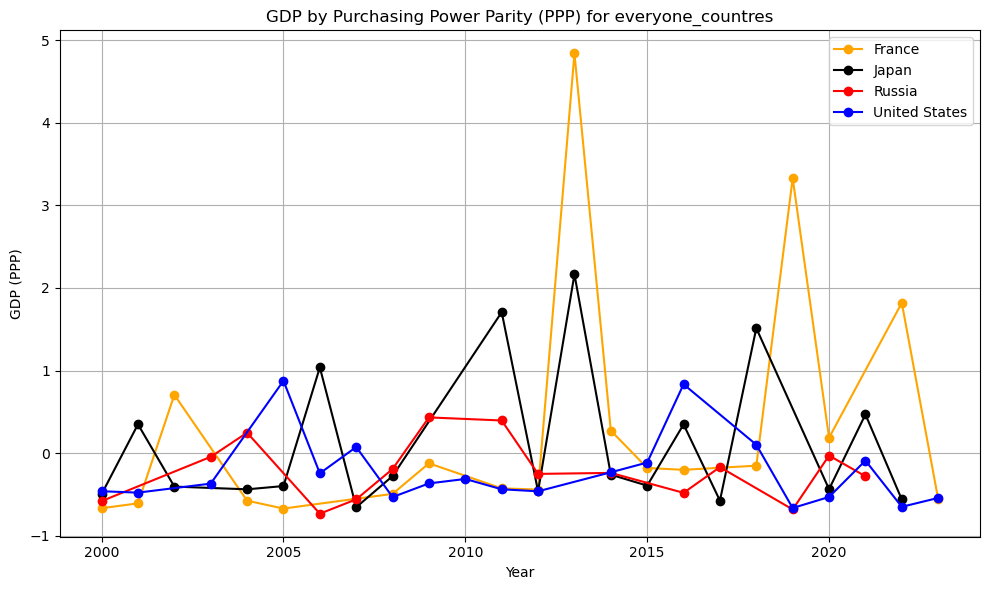

In [733]:
plt.figure(figsize= (10, 6))

aggregated_data = X_standardized.groupby(['Country', 'Year'], as_index= False).mean()
colors = ['orange', 'black', 'red', 'blue']
# Перебор уникальных стран и создание линейных графиков
for index, country  in enumerate(aggregated_data['Country'].unique()):
    country_data = aggregated_data[aggregated_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP_PPP'], marker='o', linestyle='-', label= country, color= colors[index])
    
# Настройка графика
plt.legend()
plt.title(f'GDP by Purchasing Power Parity (PPP) for everyone_countres')
plt.xlabel('Year')
plt.ylabel('GDP (PPP)')
plt.grid()

# Автоматическая настройка расстояний между подграфиками
plt.tight_layout()

# Отображение графиков
plt.show()

## Вывод:

- Франция (оранжевый цвет):
График Франции демонстрирует высокую волатильность(изменчивость) значений ВВП (ППС) по сравнению с другими странами.
В начале периода (2000-2003 гг.) значения ВВП (ППС) были ниже среднего.
Наблюдается пиковый всплеск (2012-2013), когда значение ВВП (ППС) достигает своего максимума, примерно на 5 стандартных отклонений выше среднего значения.
После 2013 года значения ВВП (ППС) снова снижаются, опускаясь ниже среднего уровня, а затем снова растут к 2021 году, после чего снова снижаются.
Это говорит о том, что экономика Франции демонстрирует значительные колебания покупательной способности, с периодами значительного роста и спада.

Вывод: покупательная способность населения Франции была крайне нестабильной в течение данного периода времени, но был один год, когда она превзошла все остальные страны.

- Япония (черный цвет):
В начале периода (2000-2003 гг.) значения ВВП (ППС) были ниже среднего.
График показывает сильную волатильность(изменчивость) с выраженными пиками и спадами, хотя и не такими сильными, как у Франции.
Самый высокий пик (около 2,2 стандартных отклонений выше среднего) достигается в 2013 году, после чего происходит значительное снижение.
В последние годы значения ВВП (ППС) в основном находятся около среднего значения.

Вывод: покупательная способность населения Японии также была нестабильной, но пик был не таким большим, как во Франции.

- Россия (красный цвет):
В большинстве периодов значения ВВП (ППС) находятся ниже среднего значения, что означает относительно более низкую покупательную способность.
Колебания значений относительно невелики, за исключением нескольких коротких периодов.
Самый высокий пик не превышает 0.5 стандартных отклонений.
После 2016 года покупательная способность населения России немного снизилась.

Вывод: покупательная способность населения России была относительно ниже, чем в других странах, на протяжении всего периода и демонстрирует меньшую волатильность(изменчивость).

- США (синий цвет):
График показывает относительно стабильные значения ВВП (ППС), преимущественно около или немного выше среднего.
Сильных колебаний, как у Франции или Японии, не наблюдается.
В период с 2005 по 2009 год наблюдается рост выше среднего, а затем небольшое снижение.
С 2018 по 2021 год значения находятся на среднем уровне.

Вывод: США демонстрируют относительно стабильную покупательную способность на протяжении рассматриваемого периода.

# Этап 4

# Научимся предсказывать стоимость жизни (с помощью линейной регрессии)

### Линейная регрессия 

Вспоминаем содержимое исходного DataFrame:

In [734]:
DF_LOADED

Country  Year  Average_Monthly_Income  Cost_of_Living  \
0        Australia  2013                 3483.92         1106.07   
1            India  2019                 7771.03         5422.78   
2           Russia  2004                 6991.30         3972.36   
3     South Africa  2011                 6628.04         6755.75   
4           Brazil  2015                 2434.27         2656.36   
..             ...   ...                     ...             ...   
495         Canada  2007                 5238.60         6129.17   
496         France  2004                 2448.53         5719.11   
497         Mexico  2003                 5255.04         5614.20   
498         Brazil  2023                 4549.89         2410.88   
499  United States  2005                 6348.84          934.07   

     Housing_Cost_Percentage  Tax_Rate  Savings_Percentage  \
0                      32.09     27.50                1.74   
1                      25.21     29.30                3.35   
2                      40.85     22.94               15.48   
3                      30.38     15.69                8.03   
4                      49.27     12.44               25.06   
..                       ...       ...                 ...   
495                    25.25     29.96                4.78   
496                    45.67     11.97                4.81   
497                    26.82     36.16                2.11   
498                    45.11     15.06                5.57   
499                    28.38     17.87               19.93   

     Healthcare_Cost_Percentage  Education_Cost_Percentage  \
0                         18.23                       6.94   
1                         17.21                      12.42   
2                         15.28                       7.10   
3                          6.66                      11.76   
4                          9.34                       3.63   
..                          ...                        ...   
495                       15.87                       7.77   
496                        6.67                       8.91   
497                       14.12                      13.36   
498                        9.22                      14.94   
499                        7.60                       9.58   

     Transportation_Cost_Percentage         Region  
0                             17.19        Oceania  
1                              9.90           Asia  
2                              9.59         Europe  
3                             11.04         Africa  
4                             15.09  South America  
..                              ...            ...  
495                           15.88  North America  
496                            6.69         Europe  
497                           11.12  North America  
498                           18.30  South America  
499                            5.71  North America  

[500 rows x 11 columns]

Будем работать с данными, в которых мы попытались уменьшить количество выбросов с помошью DBSCAN:

In [735]:
DF_LOADED_WITHOUT_EMISSIONS

Country  Year  Average_Monthly_Income  Cost_of_Living  \
0        Australia  2013                 3483.92         1106.07   
1            India  2019                 7771.03         5422.78   
2           Russia  2004                 6991.30         3972.36   
3     South Africa  2011                 6628.04         6755.75   
4           Brazil  2015                 2434.27         2656.36   
..             ...   ...                     ...             ...   
493          Japan  2002                 5126.95         2912.11   
495         Canada  2007                 5238.60         6129.17   
496         France  2004                 2448.53         5719.11   
497         Mexico  2003                 5255.04         5614.20   
499  United States  2005                 6348.84          934.07   

     Housing_Cost_Percentage  Tax_Rate  Savings_Percentage  \
0                      32.09     27.50                1.74   
1                      25.21     29.30                3.35   
2                      40.85     22.94               15.48   
3                      30.38     15.69                8.03   
4                      49.27     12.44               25.06   
..                       ...       ...                 ...   
493                    40.59     27.57               19.66   
495                    25.25     29.96                4.78   
496                    45.67     11.97                4.81   
497                    26.82     36.16                2.11   
499                    28.38     17.87               19.93   

     Healthcare_Cost_Percentage  Education_Cost_Percentage  \
0                         18.23                       6.94   
1                         17.21                      12.42   
2                         15.28                       7.10   
3                          6.66                      11.76   
4                          9.34                       3.63   
..                          ...                        ...   
493                        8.56                       4.30   
495                       15.87                       7.77   
496                        6.67                       8.91   
497                       14.12                      13.36   
499                        7.60                       9.58   

     Transportation_Cost_Percentage         Region  
0                             17.19        Oceania  
1                              9.90           Asia  
2                              9.59         Europe  
3                             11.04         Africa  
4                             15.09  South America  
..                              ...            ...  
493                           10.44           Asia  
495                           15.88  North America  
496                            6.69         Europe  
497                           11.12  North America  
499                            5.71  North America  

[438 rows x 11 columns]

Будем использовать линейную регрссию для предсказания Cost_of_Living:
Для обучения модели буду использовать LinearRegression из библиотеки sklearn

In [736]:
Y = DF_LOADED_WITHOUT_EMISSIONS[COST_L] # Y - отклик или зависимая переменная
X = DF_LOADED_WITHOUT_EMISSIONS.copy() # X - это предикат или независимая переменная
del X['Year']
del X[COST_L]
del X['Region']
del X['Country']
# Все не числовые необходимые признаки переведем в бинарные признаки, которые были на Этапе 2 (пункт: a)
X = X.join(other= REGION_COLS)

# изменяем данные с процентами от дохода на доллары для удобства

new_columns = []
percentage_word = '_Percentage'
for column in X.columns:
    if re.search(pattern= percentage_word, string= column, flags= re.IGNORECASE):
        new_columns.append(column.replace(percentage_word, ''))
        X[column] = X[AVG_MI] * X[column]
    else:
        new_columns.append(column)
        
X.columns = new_columns

X

Average_Monthly_Income  Housing_Cost  Tax_Rate      Savings  \
0                   3483.92   111798.9928     27.50    6062.0208   
1                   7771.03   195907.6663     29.30   26032.9505   
2                   6991.30   285594.6050     22.94  108225.3240   
3                   6628.04   201359.8552     15.69   53223.1612   
4                   2434.27   119936.4829     12.44   61002.8062   
..                      ...           ...       ...          ...   
493                 5126.95   208102.9005     27.57  100795.8370   
495                 5238.60   132274.6500     29.96   25040.5080   
496                 2448.53   111824.3651     11.97   11777.4293   
497                 5255.04   140940.1728     36.16   11088.1344   
499                 6348.84   180180.0792     17.87  126532.3812   

     Healthcare_Cost  Education_Cost  Transportation_Cost  Africa   Asia  \
0         63511.8616      24178.4048           59888.5848   False  False   
1        133739.4263      96516.1926           76933.1970   False   True   
2        106827.0640      49638.2300           67046.5670   False  False   
3         44142.7464      77945.7504           73173.5616    True  False   
4         22736.0818       8836.4001           36733.1343   False  False   
..               ...             ...                  ...     ...    ...   
493       43886.6920      22045.8850           53525.3580   False   True   
495       83136.5820      40703.9220           83188.9680   False  False   
496       16331.6951      21816.4023           16380.6657   False  False   
497       74201.1648      70207.3344           58436.0448   False  False   
499       48251.1840      60821.8872           36251.8764   False  False   

     Europe  North America  Oceania  South America  
0     False          False     True          False  
1     False          False    False          False  
2      True          False    False          False  
3     False          False    False          False  
4     False          False    False           True  
..      ...            ...      ...            ...  
493   False          False    False          False  
495   False           True    False          False  
496    True          False    False          False  
497   False           True    False          False  
499   False           True    False          False  

[438 rows x 13 columns]

In [737]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # random_state - это ядро датчика случайных чисел

Далее очень хочется нормализовать или стандартизовать данные, но ссылаясь на данную статью: 

https://translated.turbopages.org/proxy_u/en-ru.ru.ca07f98f-675ea9dc-0cae0308-74722d776562/https/www.baeldung.com/cs/normalization-vs-standardization

Можно прийти к выводу о том, что стандартизация и нормализация не влияет на производительность регрессии


Построем модель с использованием scikit-learn:

In [738]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [739]:
def print_df_with_coef_and_predictors(model):
    data = {'intercept_bO': [model.intercept_]}
    data = {**data, **{f"{X.columns[i]}_b{i+1}": coef for i, coef in enumerate(model.coef_)}}
    df_info = pd.DataFrame(data= data).T
    df_info.columns= ['coef']
    df_info.index.name= 'predictors'
    return df_info
print_df_with_coef_and_predictors(model)

coef
predictors                            
intercept_bO               4406.797943
Average_Monthly_Income_b1    -0.147182
Housing_Cost_b2               0.001386
Tax_Rate_b3                 -13.022245
Savings_b4                   -0.002855
Healthcare_Cost_b5           -0.002376
Education_Cost_b6            -0.004279
Transportation_Cost_b7        0.009587
Africa_b8                  -197.202633
Asia_b9                      33.768485
Europe_b10                 -133.097267
North America_b11           -11.162543
Oceania_b12                 211.560284
South America_b13            96.133673

Давайте проанализируем полученные коэффиценты и предположим какие из придикторов могут коррелировать между друг другом:

<Axes: >

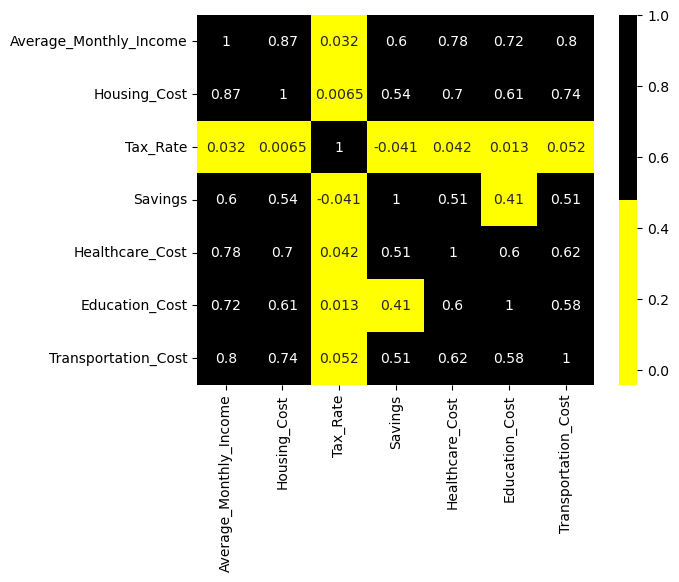

In [740]:
sns.heatmap(X.iloc[:,:7].corr(), cmap= sns.color_palette(['yellow', 'black']), annot= True)

Вывод:
Из корреляционной матрицы можно заметить, что только у налоговой ставки нет корреляцию.
Все верно т.к. сумма трат действительно зависит от заработка(мы это доказывали выше). Аналогичными рассуждениями можно пользоваться и для сумм, которые откладываются(Saving).
А т.к. мы чуть выше делали преобразования процент расходов в доллары, то и зависимость других параметров от дохода тоже не новость.

По итогу я решаюсь убрать параметр Savings, т.к. этот параметр можно вывести зная: Average_Monthle_Income и Cost_of_Living, который мы и пытаемся предсказать. 

In [741]:
# Удаляю параметр Savings и заново обучаю нашу модель
del X['Savings']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
print_df_with_coef_and_predictors(model)

coef
predictors                            
intercept_bO               4357.794923
Average_Monthly_Income_b1    -0.173828
Housing_Cost_b2               0.001170
Tax_Rate_b3                 -11.445423
Healthcare_Cost_b4           -0.003181
Education_Cost_b5            -0.003463
Transportation_Cost_b6        0.009308
Africa_b7                  -213.779665
Asia_b8                      39.034074
Europe_b9                  -138.942620
North America_b10            -8.092139
Oceania_b11                 201.623267
South America_b12           120.157083

<Axes: >

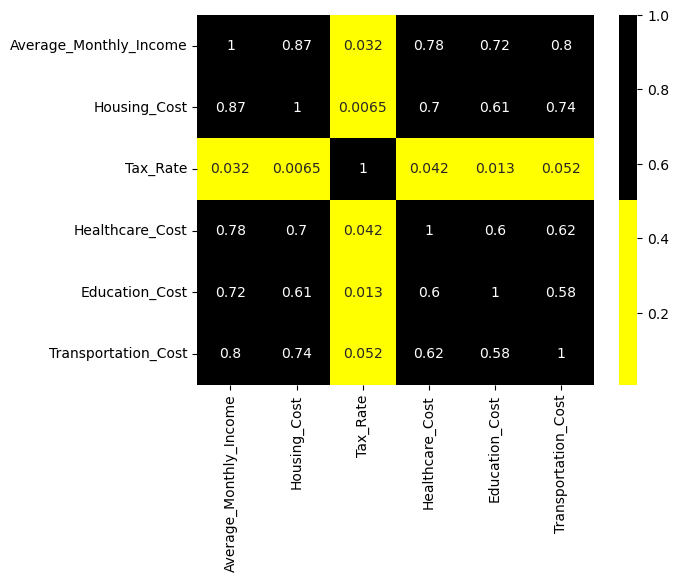

In [742]:
sns.heatmap(X.iloc[:,:6].corr(), cmap= sns.color_palette(['yellow', 'black']), annot= True)

In [743]:
# Сделаем предсказание
Y_pred = model.predict(X_test)

r2_score_model = model.score(X_test, Y_test)
print(f'Коэффициент детерминации R² (используя .score()): {r2_score_model}')

# Способ 2: Используя функцию r2_score
r2_score_manual = r2_score(Y_test, Y_pred)
print(f'Коэффициент детерминации R² (используя r2_score): {r2_score_manual}')

Коэффициент детерминации R² (используя .score()): -0.10492692167755302
Коэффициент детерминации R² (используя r2_score): -0.10492692167755302


Вывод:

Можно увидеть, что коэффицент детерминации отрицателен. Это означает, что наша модель предсказывает не очень хорошо. 
- Это может быть связано с тем, что в нашем распоряжении не так, много данных, как хотелось бы и следовательно наша модель просто не успела до конца обучиться на данных.
- Следующая проблема это зависимости между параметрами, что вероятнее всего, т.к. на корреляционной матрице видно, что между большенством параметров есть коэффицент корреляции больший чем 0.5

Решение проблемы:
- давайте попробуем делать прогноз на основе двух переменных: налогов и доходов

In [744]:
save_point_df = X.copy()
for column in X.columns:
    if (column != AVG_MI)  and (column != 'Tax_Rate'):
        del X[column]
X

Average_Monthly_Income  Tax_Rate
0                   3483.92     27.50
1                   7771.03     29.30
2                   6991.30     22.94
3                   6628.04     15.69
4                   2434.27     12.44
..                      ...       ...
493                 5126.95     27.57
495                 5238.60     29.96
496                 2448.53     11.97
497                 5255.04     36.16
499                 6348.84     17.87

[438 rows x 2 columns]

In [745]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [746]:
print_df_with_coef_and_predictors(model)

coef
predictors                            
intercept_bO               4296.278300
Average_Monthly_Income_b1    -0.075563
Tax_Rate_b2                 -11.158188

In [747]:
# Сделаем предсказание
Y_pred = model.predict(X_test)

r2_score_model = model.score(X_test, Y_test)
print(f'Коэффициент детерминации R² (используя .score()): {r2_score_model}')

# Способ 2: Используя функцию r2_score
r2_score_manual = r2_score(Y_test, Y_pred)
print(f'Коэффициент детерминации R² (используя r2_score): {r2_score_manual}')

Коэффициент детерминации R² (используя .score()): -0.030675286902983823
Коэффициент детерминации R² (используя r2_score): -0.030675286902983823


Вывод: 

Данная модель лучше, чем та которая была с коррелируемыми параметрами, но все еще не может давать хорошие предсказания.

### Полиномиальная регрессия

Попробуем использовать полиномиаьлную регрессию

In [765]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Преобразование признаков в полиномиальные
poly = PolynomialFeatures(degree= 50)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Обучение модели полиномиальной регрессии
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Предсказания на тестовой выборке
Y_pred = model.predict(X_test_poly)

# Оценка модели
r2 = r2_score(Y_test, Y_pred)

print(f'Коэффициент детерминации R²: {r2}')

Коэффициент детерминации R²: 0.021272476002690666


Вывод: использовать полиномиальную регрессию вместе с некоррелированными параметрами дает результат намного лучше, чем использование линейной регресси с некоррелированными параметрами

### Вывод

Линейная регрессия и полиномиальная регрессия плохо ложатся на данные и дают не очень хорошие предсказания на тестосвых наборах данных. Следовательно необходимо использовать более сложные модели для предсказания стоимости жизни.

Причины, которые могут стать причиной плохого score:

- Низкая объяснительная способность : 
Значение R^(2) близкое к нулю говорит о том, что модель не объясняет значительную часть вариации в данных. Это может означать, что выбранные независимые переменные не являются хорошими предикторами для зависимой переменной, но сделав корреляционную матрицу можно понять, что только данные переменные могут быть предикторами других просто нет. Следовательно отсутствуют важные факторы, которые влияют на уровень жизни. Например, в наших данных нет таких переменных, как уровень образования, доступ к медицинским услугам или экономическую ситуацию в стране.

- Модель не подходит:
Возможно, линейная или полиномиальная регрессия не являются подходящей моделью для наших данных. Если существует нелинейная зависимость между переменными,как раз таки это и может привести к плохим результатам.

- Недостаток информации:
Может быть такое, что нашей моделе просто не хватило записей в наших данных, т.к. 500 записей это не так уж много для обучения модели.